In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_excel("Yahoo Finance Dow Jones Industrial Average Jan 2013 Till March 2021.xlsx")
df.head()

Date      Open      High       Low    Close*  Adj Close**   Volume
0  Apr 01, 2021  33054.58  33167.17  32985.35  33153.21     33153.21  3118800
1  Mar 31, 2021  33116.04  33173.77  32980.57  32981.55     32981.55  4141400
2  Mar 30, 2021  33127.88  33170.93  32988.92  33066.96     33066.96  3075100
3  Mar 29, 2021  33087.55  33259.00  32905.13  33171.37     33171.37  3516100
4  Mar 26, 2021  32681.07  33098.83  32681.07  33072.88     33072.88  3821700

In [3]:
#Since the term  of a President is from around mid of Jan of a year till Jan of the end term we will need to exclude Jan prices for the start year and end year
#As Donald Trum's Presidency is from January 2017 Till January 2021, we will exclude prices before 1 Feb 2017 and prices after 31 Dec 2020
df.Date = pd.to_datetime(df.Date)
mask = (df['Date'] >= '2017-02-1') & (df['Date'] <= '2020-12-31')
df  = df.loc[mask]

In [4]:
df = df.set_axis(["Date","Open", "High", "Low","Close","Adj Close","Volume"], axis=1)
#df.set_index("Date", inplace=True)
df.head().append(df.tail())

Date      Open      High       Low     Close  Adj Close     Volume
62   2020-12-31  30417.64  30637.47  30344.50  30606.48   30606.48  284470000
63   2020-12-30  30415.09  30525.35  30393.04  30409.56   30409.56  291890000
64   2020-12-29  30492.07  30588.79  30274.24  30335.67   30335.67  357610000
65   2020-12-28  30283.23  30525.56  30283.23  30403.97   30403.97  302490000
66   2020-12-24  30155.92  30209.67  30099.30  30199.87   30199.87  145570000
1044 2017-02-07  20107.62  20155.35  20068.68  20090.29   20090.29  279670000
1045 2017-02-06  20025.61  20094.95  20002.81  20052.42   20052.42  281720000
1046 2017-02-03  19964.21  20081.48  19964.21  20071.46   20071.46  344220000
1047 2017-02-02  19858.34  19922.75  19831.09  19884.91   19884.91  347220000
1048 2017-02-01  19923.81  19967.73  19845.99  19890.94   19890.94  426670000

In [5]:
# Reference: https://www.whitehousehistory.org/the-presidents-timeline
#As the analysys of the stockmarket is based on the Donald Trumps Positive and Neative Words Tweet analysing on a daily basis is not likely

# Data re-sampled based on each week starting Friday

df = df.resample('W-FRI', on='Date').agg({'Open':'mean', 'High':'mean','Low':'mean','Close':'mean','Adj Close':'mean','Volume':'mean'})
df.head()

Open          High        Low         Close     Adj Close  \
Date                                                                            
2017-02-03  19915.453333  19990.653333  19880.430  19949.103333  19949.103333   
2017-02-10  20091.096000  20164.630000  20070.662  20127.764000  20127.764000   
2017-02-17  20481.694000  20566.052000  20456.488  20554.450000  20554.450000   
2017-02-24  20736.990000  20800.422500  20709.030  20787.670000  20787.670000   
2017-03-03  20947.508000  21006.168000  20892.746  20954.782000  20954.782000   

                  Volume  
Date                      
2017-02-03  3.727033e+08  
2017-02-10  2.958680e+08  
2017-02-17  3.500640e+08  
2017-02-24  3.105150e+08  
2017-03-03  3.125800e+08

In [6]:
df.head().append(df.tail())

Open          High         Low         Close  \
Date                                                               
2017-02-03  19915.453333  19990.653333  19880.4300  19949.103333   
2017-02-10  20091.096000  20164.630000  20070.6620  20127.764000   
2017-02-17  20481.694000  20566.052000  20456.4880  20554.450000   
2017-02-24  20736.990000  20800.422500  20709.0300  20787.670000   
2017-03-03  20947.508000  21006.168000  20892.7460  20954.782000   
2020-12-04  29851.498000  30033.894000  29745.4520  29906.826000   
2020-12-11  30096.310000  30186.790000  29917.7600  30071.622000   
2020-12-18  30152.928000  30294.490000  30013.9300  30139.564000   
2020-12-25  30140.462500  30251.635000  29973.6125  30140.415000   
2021-01-01  30402.007500  30569.292500  30323.7525  30438.920000   

               Adj Close        Volume  
Date                                    
2017-02-03  19949.103333  3.727033e+08  
2017-02-10  20127.764000  2.958680e+08  
2017-02-17  20554.450000  3.500640e+08  
2017-02-24  20787.670000  3.105150e+08  
2017-03-03  20954.782000  3.125800e+08  
2020-12-04  29906.826000  4.256820e+08  
2020-12-11  30071.622000  3.553880e+08  
2020-12-18  30139.564000  4.523880e+08  
2020-12-25  30140.415000  3.114775e+08  
2021-01-01  30438.920000  3.091150e+08

In [7]:
#To use only the Closing Price
df_price = df[['Close']]
df_price.head().append(df_price.tail())

Close
Date                    
2017-02-03  19949.103333
2017-02-10  20127.764000
2017-02-17  20554.450000
2017-02-24  20787.670000
2017-03-03  20954.782000
2020-12-04  29906.826000
2020-12-11  30071.622000
2020-12-18  30139.564000
2020-12-25  30140.415000
2021-01-01  30438.920000

In [8]:
from collections import Counter

In [9]:
#Load opinion words from Professor Bing Liu: http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar
def readwords(filename):
    f = open(filename)
    words = [ line.rstrip() for line in f.readlines()]
    return words
positive = readwords('positive-words.txt')
negative = readwords('negative-words.txt')

In [10]:
#Load Turmps Tweets
df_corpus = pd.read_csv("realdonaldtrump.csv")
df_corpus.head()

id                                               link  \
0  1698308935  https://twitter.com/realDonaldTrump/status/169...   
1  1701461182  https://twitter.com/realDonaldTrump/status/170...   
2  1737479987  https://twitter.com/realDonaldTrump/status/173...   
3  1741160716  https://twitter.com/realDonaldTrump/status/174...   
4  1773561338  https://twitter.com/realDonaldTrump/status/177...   

                                             content                 date  \
0  Be sure to tune in and watch Donald Trump on L...  2009-05-04 13:54:25   
1  Donald Trump will be appearing on The View tom...  2009-05-04 20:00:10   
2  Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 08:38:08   
3  New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 15:40:15   
4  "My persona will never be that of a wallflower...  2009-05-12 09:07:28   

   retweets  favorites mentions hashtags  
0       510        917      NaN      NaN  
1        34        267      NaN      NaN  
2        13         19      NaN      NaN  
3        11         26      NaN      NaN  
4      1375       1945      NaN      NaN

In [11]:
#Clean Trump's Tweets using Text Hero
import texthero as hero
# clean the news content by using clean method from hero package
df_corpus['clean_content'] = hero.clean(df_corpus['content'])

In [12]:
df_corpus[['content','clean_content']].head()

content  \
0  Be sure to tune in and watch Donald Trump on L...   
1  Donald Trump will be appearing on The View tom...   
2  Donald Trump reads Top Ten Financial Tips on L...   
3  New Blog Post: Celebrity Apprentice Finale and...   
4  "My persona will never be that of a wallflower...   

                                       clean_content  
0  sure tune watch donald trump late night david ...  
1  donald trump appearing view tomorrow morning d...  
2  donald trump reads top ten financial tips late...  
3  new blog post celebrity apprentice finale less...  
4  persona never wallflower ' rather build walls ...

In [13]:
#Below script to export back to Excel
#df_corpus.to_excel('Cleaned Trump Text.xlsx', index = False)

In [14]:
#We select the 'date' and the 'clean_content' fileds to work on
df_corpus_cleaned = df_corpus[['date','clean_content']]
df_corpus_cleaned.head()

date                                      clean_content
0  2009-05-04 13:54:25  sure tune watch donald trump late night david ...
1  2009-05-04 20:00:10  donald trump appearing view tomorrow morning d...
2  2009-05-08 08:38:08  donald trump reads top ten financial tips late...
3  2009-05-08 15:40:15  new blog post celebrity apprentice finale less...
4  2009-05-12 09:07:28  persona never wallflower ' rather build walls ...

In [15]:
df_corpus_cleaned.shape

(43352, 2)

In [16]:
df_corpus_cleaned.iloc[3:7, 1]

3    new blog post celebrity apprentice finale less...
4    persona never wallflower ' rather build walls ...
5    miss usa tara conner fired always believer sec...
6    listen interview donald trump discussing new b...
Name: clean_content, dtype: object

In [17]:
for i in range(len(df_corpus_cleaned)):
    df_corpus_cleaned.iloc[i, 0]
    count = Counter(df_corpus_cleaned.iloc[i, 1].split())
    print (count)

Counter({'sure': 1, 'tune': 1, 'watch': 1, 'donald': 1, 'trump': 1, 'late': 1, 'night': 1, 'david': 1, 'letterman': 1, 'presents': 1, 'top': 1, 'ten': 1, 'list': 1, 'tonight': 1})
Counter({'donald': 1, 'trump': 1, 'appearing': 1, 'view': 1, 'tomorrow': 1, 'morning': 1, 'discuss': 1, 'celebrity': 1, 'apprentice': 1, 'new': 1, 'book': 1, 'think': 1, 'like': 1, 'champion': 1})
Counter({'donald': 1, 'trump': 1, 'reads': 1, 'top': 1, 'ten': 1, 'financial': 1, 'tips': 1, 'late': 1, 'show': 1, 'david': 1, 'letterman': 1, 'http': 1, 'tinyurl': 1, 'com': 1, 'ooafwn': 1, 'funny': 1})
Counter({'new': 1, 'blog': 1, 'post': 1, 'celebrity': 1, 'apprentice': 1, 'finale': 1, 'lessons': 1, 'learned': 1, 'along': 1, 'way': 1, 'http': 1, 'tinyurl': 1, 'com': 1, 'qlux5e': 1})
Counter({'persona': 1, 'never': 1, 'wallflower': 1, "'": 1, 'rather': 1, 'build': 1, 'walls': 1, 'cling': 1, 'donald': 1, 'j': 1, 'trump': 1})
Counter({'miss': 1, 'usa': 1, 'tara': 1, 'conner': 1, 'fired': 1, 'always': 1, 'believer':

Counter({'bats67': 1, 'parent': 1, 'education': 1, 'high': 1, 'priority': 1, 'important': 1, 'went': 1, 'one': 1, 'best': 1, 'schools': 1, 'cont': 1, 'http': 1, 'tl': 1, 'gd': 1, 'fq5mkc': 1})
Counter({'barackobama': 1, 'hard': 1, 'work': 1, 'yesterday': 1, 'shooting': 1, 'marshmallow': 1, 'cannon': 1, 'wh': 1, 'east': 1, 'room': 1, 'country': 1, 'burns': 1, 'http': 1, 'bit': 1, 'ly': 1, 'wicxjd': 1})
Counter({'grimeygatsby': 1, 'require': 1, 'four': 1, 'hours': 1, 'sleep': 1, 'per': 1, 'night': 1})
Counter({'stass13': 1, 'sorry': 1, 'taken': 1})
Counter({'government': 1, 'dependency': 1, 'surged': 1, 'since': 1, 'barackobama': 1, 'taken': 1, 'office': 1, 'http': 1, 'bit': 1, 'ly': 1, 'ziuyoc': 1, 'creating': 1, 'entitlement': 1, 'culture': 1})
Counter({'fatmaninaspeedo': 1, 'met': 1, 'macmiller': 1, 'song': 1, 'donald': 1, 'trump': 1, 'milion': 1, 'hits': 1, 'maybe': 1, 'pay': 1, 'somethiing': 1})
Counter({'npbraden': 1, 'already': 1, 'two': 1, 'great': 1, 'pilots': 1})
Counter({'obam

Counter({'real': 1, 'unemployment': 1, 'rate': 1, 'according': 1, 'cbo': 1, 'http': 1, 'bit': 1, 'ly': 1, 'aeepgz': 1, 'barackobama': 1, 'economic': 1, 'recovery': 1, 'hope': 1})
Counter({'chinese': 1, 'laugh': 1, 'weak': 1, 'pathetic': 1, 'government': 1, 'combating': 1, 'intellectual': 1, 'property': 1, 'theft': 1, 'cont': 1, 'http': 1, 'tl': 1, 'gd': 1, 'g70qiu': 1})
Counter({'strong': 2, 'history': 1, 'teaches': 1, 'us': 1, 'anything': 1, 'nations': 1, 'require': 1, 'leaders': 1, 'clearly': 1, 'defined': 1, 'national': 1, 'cont': 1, 'http': 1, 'tl': 1, 'gd': 1, 'g7105t': 1})
Counter({'dopey': 1, 'georgewill': 1, 'overrated': 1, 'political': 1, 'pundit': 1, 'business': 1, 'continues': 1, 'downgrade': 1, 'republican': 1, 'cont': 1, 'http': 1, 'tl': 1, 'gd': 1, 'g910rl': 1})
Counter({'trump': 1, 'tuesday': 1, 'squawk': 1, 'box': 1, 'tomorrow': 1, 'morning': 1, 'et': 1, 'cnbc': 1})
Counter({'tuesday': 2, 'trump': 1, 'tomorrow': 1, 'morning': 1, 'squawkcnbc': 1, 'et': 1, 'talking': 1, '

Counter({'series': 1, 'nyrangers': 1, 'nhldevils': 1, 'turning': 1, 'tonight': 1, 'game': 1, 'another': 1, 'close': 1, 'one': 1})
Counter({'lolo': 1, 'jones': 1, 'beautiful': 1, 'olympic': 1, 'athlete': 1, 'wants': 1, 'remain': 1, 'virgin': 1, 'gets': 1, 'married': 1, 'great': 1, 'followlolo': 1})
Counter({'cadillac': 2, 'made': 1, 'amazing': 1, 'strides': 1, 'beauty': 1, 'quality': 1, 'cars': 1, 'great': 1, 'management': 1, 'team': 1, 'congratulations': 1})
Counter({'josh': 1, 'brolin': 1, 'friend': 1, 'mine': 1, 'terrific': 1, 'men': 1, 'black': 1, 'congrats': 1})
Counter({'go': 2, 'path': 2, 'may': 1, 'lead': 1, 'instead': 1, 'leave': 1, 'trail': 1, 'ralph': 1, 'waldo': 1, 'emerson': 1})
Counter({'newsmax': 1, 'media': 1, 'interview': 1, 'discussing': 1, 'opec': 1, 'us': 1, 'gas': 1, 'resources': 1, 'mittromney': 1, 'running': 1, 'campaign': 1, 'barackobama': 1, 'http': 1, 'bit': 1, 'ly': 1, 'jzv4x3': 1})
Counter({'egypt': 1, 'going': 1, 'exact': 1, 'opposite': 1, 'soon': 1, 'strong

Counter({'trump': 2, 'donald': 1, 'could': 1, 'defy': 1, 'conventional': 1, 'wisdom': 1, 'chattering': 1, 'class': 1, 'november': 1, 'newsmax': 1, 'media': 1, 'cover': 1, 'effect': 1})
Counter({'new': 1, 'mittromney': 1, 'tv': 1, 'ad': 1, 'dream': 1, 'small': 1, 'businesses': 1, 'hope': 1, 'change': 1, 'kind': 1, 'http': 1, 'mi': 1, 'tt': 1, 'miivar': 1, 'tcot': 1})
Counter({'good': 1, 'article': 1, 'happened': 1, 'american': 1, 'men': 1, 'newsmax': 1, 'michael': 1, 'cohenhttp': 1, 'bit': 1, 'ly': 1, 'mjcuaz': 1})
Counter({'ohio': 1, 'senator': 1, 'robportman': 1, 'mittromney': 1, 'knows': 1, 'return': 1, 'prosperity': 1, 'http': 1, 'mi': 1, 'tt': 1, 'nlzcxs': 1, 'mitt2012': 1, 'tcot': 1})
Counter({'mittromney': 1, 'op': 1, 'ed': 1, 'culture': 1, 'matter': 1, 'http': 1, 'mi': 1, 'tt': 1, 'onumy3': 1})
Counter({'barackobama': 1, 'issuing': 1, 'regulatory': 1, 'demands': 1, 'states': 1, 'ordering': 1, 'firings': 1, 'novemberhttp': 1, 'bit': 1, 'ly': 1, 'qatfaq': 1})
Counter({'deficits': 

Counter({'fun': 1, 'love': 1, 'find': 1, 'national': 1, 'achievers': 1, 'conference': 1, 'october': 1, 'http': 1, 'www': 1, 'nationalachieverscongress': 1, 'co': 1, 'uk': 1})
Counter({'costs': 2, 'rising': 1, 'premium': 1, 'obamacare': 1, 'cost': 1, 'businesses': 1, 'billions': 1, 'http': 1, 'bit': 1, 'ly': 1, 'sepled': 1, 'guess': 1, 'new': 1, 'get': 1, 'passed': 1, '-': 1})
Counter({'interestingly': 1, 'people': 1, 'seem': 1, 'lucky': 1})
Counter({'matter': 1, 'diligent': 1, 'evaluating': 1, 'business': 1, 'deal': 1, 'invariably': 1, 'one': 1, 'factor': 1, 'control': 1, 'luck': 1})
Counter({'foxandfriends': 1, 'monday': 1, 'tune': 1})
Counter({'jtatsuno': 1, 'real': 1})
Counter({'letter': 1, 'amazing': 1, 'woman': 1, 'http': 1, 'fb': 1, 'p6qyeh': 1})
Counter({'letter': 1, 'written': 1, 'one': 1, 'many': 1, 'critics': 1, 'http': 1, 'fb': 1, 'sjvmku': 1})
Counter({'laurconnors': 1, 'thank': 1, 'great': 1, 'time': 1})
Counter({'ryder': 1, 'cup': 1, 'amazing': 1, 'week': 1})
Counter({'le

Counter({'win': 2, 'obama': 1, 'zero': 1, 'credibility': 1, 'oil': 1, 'coal': 1, 'energy': 1, 'country': 1, 'period': 1})
Counter({'believe': 1, 'barack': 1, 'hussein': 1, 'obama': 1, 'aka': 1, 'barry': 1, 'soetoro': 1, 'looked': 1, 'like': 1, 'president': 1, 'last': 1, 'night': 1})
Counter({'obama': 1, 'much': 1, 'better': 1, 'last': 1, 'time': 1, 'still': 1, 'lost': 1, 'decisively': 1})
Counter({'polls': 1, 'starting': 1, 'look': 1, 'really': 1, 'bad': 1, 'obama': 1, 'looks': 1, 'like': 1, 'start': 1, 'war': 1, 'major': 1, 'conflict': 1, 'win': 1, 'put': 1, 'past': 1})
Counter({'twitter': 1, 'become': 1, 'powerful': 1, 'actually': 1, 'make': 1, 'enemies': 1, 'tell': 1, 'truth': 1})
Counter({'twitter': 1, 'followers': 1, 'soon': 1, 'million': 1, 'biggies': 1, 'like': 1, 'newspaper': 1})
Counter({'interview': 1, 'realmichaelkay': 1, 'discussing': 1, 'rod': 1, 'fired': 1, 'yankees': 1, 'terminate': 1, 'contract': 1, 'http': 1, 'es': 1, 'pn': 1, 'ctby8e': 1})
Counter({'marileenelson': 1,

Counter({'watch': 1, 'obama': 1, 'refuse': 1, 'call': 1, 'benghazi': 1, 'terrorist': 1, 'attack': 1, 'http': 1, 'bit': 1, 'ly': 1, 'ysdzqy': 1, 'took': 1, 'cbs': 1, 'long': 1, 'release': 1, 'footage': 1})
Counter({'obama': 1, 'thinks': 1, 'laugh': 1, 'fact': 1, 'refuses': 1, 'release': 1, 'records': 1, 'american': 1, 'public': 1})
Counter({'tappersong': 1, 'thanks': 1, 'gary': 1})
Counter({'federal': 1, 'gov': 1, 'handled': 1, 'sandy': 1, 'worse': 1, 'katrina': 1, 'excuse': 1, 'people': 1, "'": 1, 'electricity': 1, 'fuel': 1, 'yet': 1})
Counter({'abfalecbaldwin': 1, 'alec': 1, 'science': 1, 'con': 1, 'read': 1, 'e': 1, 'mails': 1})
Counter({'federal': 1, 'gov': 1, 'handled': 1, 'sandy': 1, 'worse': 1, 'katrina': 1, 'excuse': 1, 'people': 1, 'electricity': 1, 'fuel': 1, 'yet': 1})
Counter({'still': 1, 'want': 1, 'president': 1, 'bows': 1, 'saudis': 1, 'lets': 1, 'opec': 1, 'rip': 1, 'us': 1, 'make': 1, 'america': 1, 'strong': 1, 'vote': 1, 'mittromney': 1})
Counter({'pleasure': 1, 'gett

Counter({'pm': 1, 'cameron': 1, 'dummy': 1, 'monumental': 1, 'cuts': 1, 'uk': 1, 'spending': 1, 'come': 1, 'continues': 1, 'spend': 1, 'billions': 1, 'pounds': 1})
Counter({'carloguderian': 1, 'built': 1, 'perhaps': 1, 'greatest': 1, 'golf': 1, 'course': 1, 'world': 1, 'lots': 1, 'tourism': 1})
Counter({'colonopenbrakit': 1, 'loser': 1, 'andy': 1, 'murray': 1, 'winner': 1})
Counter({'kleckhardt': 1, 'kris': 1, 'great': 1, 'place': 1, 'enjoy': 1})
Counter({'bongsi21': 1, 'billgates': 1, 'itsmemvp': 1, 'work': 1, 'hard': 1})
Counter({'orangetrump': 1, 'apoliticalbear': 1, 'forq2': 1, 'danabrams': 1, 'sure': 1})
Counter({'macfarb': 1, 'wow': 1, 'nice': 1})
Counter({'karzai': 1, 'afghanistan': 1, 'sticking': 1, 'signed': 1, 'agreement': 1, 'dropping': 1, 'us': 1, 'like': 1, 'dopes': 1, 'get': 1, 'build': 1, 'u': 1})
Counter({'via': 1, 'usatoday': 1, '"trump': 1, 'endorses': 1, 'wintour': 1, 'ambassadorship"http': 1, 'usat': 1, 'ly': 1, 'qjwuyd': 1})
Counter({'support': 1, 'anna': 1, 'winto

Counter({'going': 1, 'ask': 1, 'katherine': 1, 'webb': 1, 'judge': 1, 'miss': 1, 'usa': 1, 'pageant': 1, 'coming': 1, 'las': 1, 'vegas': 1})
Counter({'fans': 1, 'going': 1, 'love': 1, 'tasks': 1, 'upcoming': 1, '13th': 1, 'season': 1, 'star': 1, 'celebapprentice': 1, 'biggest': 1, 'yet': 1})
Counter({'ryanmjanderson': 1, 'celebapprentice': 1, 'march': 1, '3rd': 1})
Counter({'seanelmi': 1, 'thanks': 1, 'sean': 1})
Counter({'381days': 1, 'thank': 1})
Counter({'"': 2, 'game': 1, 'knowledge': 1, 'key': 1, 'power': 1, 'think': 1, 'big': 1})
Counter({'conniegrn777': 1, 'alabamaftbl': 1, 'great': 1})
Counter({'tweetsfromnancy': 1, 'interesting': 1, 'view': 1})
Counter({'c': 1, 'pearson': 1, 'true': 1})
Counter({'jrstout5000': 1})
Counter({'caarlatwiter': 1, 'fantastic': 1})
Counter({'usfiscalsanity': 1, 'work': 1, 'hard': 1})
Counter({'kevinm': 1, 'mielke': 1, 'true': 1})
Counter({'joeisterrific': 1, 'thanks': 1, 'joe': 1})
Counter({'good': 2, '"\'': 1, 'found': 1, "'": 1, 'two': 1, 'things':

Counter({'take': 2, 'chances': 2, 'go': 1, 'gut': 1, 'think': 1, 'ingredients': 1, 'need': 1, 'biggest': 1, 'successes': 1})
Counter({'impossible': 1, 'word': 1, 'found': 1, 'dictionary': 1, 'fools': 1, 'napoleon': 1, 'bonaparte': 1})
Counter({'frankb550': 1, 'thanks': 1})
Counter({'gotowardsthesun': 1, 'good': 1, 'luck': 1})
Counter({'rapone91': 1, 'agree': 1})
Counter({'cjohnson623': 1, 'one': 1, 'thanks': 1})
Counter({'jim': 1, 'w': 1, 'magee': 1, 'thank': 1})
Counter({'jeffcdl': 1, 'indeed': 1, 'true': 1})
Counter({'mikekunert': 1, 'jerryrice': 1, 'true': 1})
Counter({'thegnomeabides': 1, 'thanks': 1})
Counter({'tbrown2334': 1, 'good': 1})
Counter({'orangepop911': 1})
Counter({'mala13slp': 1, 'barackobama': 1, 'true': 1})
Counter({'maintained': 2, 'real': 2, 'estate': 2, 'well': 1, 'always': 1, 'going': 1, 'worth': 1, 'lot': 1, 'poorly': 1, 'art': 1, 'deal': 1})
Counter({'little': 1, 'macmiller': 1, 'sent': 1, 'expensive': 1, 'plaque': 1, 'making': 1, 'song': 1, '"donald': 1, 'trum

Counter({'gop': 1, 'need': 1, 'face': 1, 'reality': 1, '-': 1, 'one': 1, 'illegal': 1, 'immigrants': 1, 'granted': 1, 'amnesty': 1, 'vote': 1, 'republican': 1})
Counter({'plsclonenugent': 1, 'thanks': 1, 'susan': 1})
Counter({'makeupwithme7': 1, 'thanks': 1, 'work': 1, 'hard': 1, 'every': 1, 'day': 1})
Counter({'good': 2, 'mayorgas': 1, 'luck': 1})
Counter({'kaybee0h': 1, 'acnnews': 1, 'look': 1, 'forward': 1, 'big': 1, 'crowd': 1})
Counter({'office': 1, 'banana': 1, 'joe': 1, 'wkcdogs': 1, 'msgnyc': 1, 'http': 1, 'fb': 1, '1irjmurug': 1})
Counter({'eawiii': 1, 'melaniatrump': 1, 'thank': 1, 'edward': 1})
Counter({'johnssaba': 1, 'great': 1, 'thanks': 1})
Counter({'microger': 1, 'right': 1, 'billions': 1})
Counter({'egypt': 1, 'destroy': 1, 'civil': 1, 'society': 1, 'w': 1, 'muslim': 1, 'brotherhood': 1, 'complete': 1, 'economic': 1, 'mess': 1, 'http': 1, 'bit': 1, 'ly': 1, 'vu8ccr': 1})
Counter({'surprise': 1, 'talk': 1, 'amnesty': 1, 'dc': 1, 'illegal': 1, 'immigration': 1, 'picking'

Counter({'ever': 2, 'jimmiejscott': 1, 'realdonaldtrump': 1, 'think': 1, 'theapprentice': 1, 'would': 1, 'ratings': 1, 'machine': 1, 'long': 1, 'knows': 1})
Counter({'samijok': 1, 'realdonaldtrump': 1, 'think': 1, 'jodiarias': 1, 'guilty': 1, 'yes': 1, 'doubt': 1})
Counter({'roxannequintana': 1, 'hollyrpeete': 1, 'awe': 1, 'get': 1, 'better': 1, 'fast': 1, 'little': 1, 'one': 1, 'xoxoxo': 1, 'thanks': 1, 'roxanne': 1})
Counter({'cnn': 2, 'erin': 1, 'burnett': 1, 'ratings': 1, 'prime': 1, 'time': 1, 'wants': 1, 'money': 1, 'move': 1, 'morning': 1, 'slot': 1, 'say': 1, 'way': 1})
Counter({'going': 1, 'long': 1, 'tough': 1, 'road': 1, 'turn': 1, 'around': 1, 'cnn': 1, 'looking': 1, 'wrong': 1, 'people': 1})
Counter({'ravdaddy': 1, 'realdonaldtrump': 1, 'looking': 1, 'would': 1, 'tell': 1, 'cnn': 1, 'smart': 1, 'enough': 1, 'ask': 1})
Counter({'thanks': 1, 'matthew': 1})
Counter({'popular': 1, 'request': 1, 'live': 1, 'tweeting': 1, 'celebrity': 1, 'apprentice': 1, 'sunday': 1, 'p': 1})
Co

Counter({'greenolive': 1, 'r': 1, 'mcuban': 1, 'trumping': 1, 'trumpster': 1, 'realdonaldtrump': 1, 'live': 1, 'moron': 1})
Counter({'julzz': 1, 'realdonaldtrump': 1, 'got': 1, 'bankrupted': 1, 'times': 1, 'hell': 1, 'trusts': 1, 'anything': 1, 'never': 1, 'went': 1, 'bankrupt': 1, 'moron': 1})
Counter({'mcuban': 1, 'short': 1, 'tee': 1, 'much': 1, 'punch': 1, 'weak': 1, 'man': 1, 'big': 1, 'mouth': 1})
Counter({'billdaley1': 1, 'true': 1})
Counter({'entrepreneur': 1, 'record': 1, 'realdonaldtrump': 1, 'authored': 1, 'best': 1, 'selling': 1, 'books': 1, 'mcuban': 1, 'winning': 1, 'exact': 1, 'thanks': 1})
Counter({'niecey911logan': 1, 'thanks': 1})
Counter({'cathmiriam': 1, 'love': 1, 'fact': 1, 'everyone': 1, 'tweets': 1, 'mean': 1, 'things': 1, 'realdonaldtrump': 1, 'poor': 1, 'idiots': 1, 'sense': 1, 'playnice': 1, 'true': 1})
Counter({'kimfloyd2012': 1, 'realdonaldtrump': 1, 'hope': 1, 'great': 1, 'day': 1, 'loved': 1, 'speech': 1, 'cpac': 1, 'thanks': 1, 'kim': 1})
Counter({'geeop

Counter({'via': 1, 'urbanturf': 1, 'dc': 1, 'trump': 1, 'releases': 1, 'renderings': 1, 'old': 1, 'post': 1, 'office': 1, 'building': 1, 'http': 1, 'bit': 1, 'ly': 1, '12cinrf': 1})
Counter({'billmoyers': 1, 'liberal': 1, 'hack': 1, 'whose': 1, 'career': 1, 'laid': 1, 'rest': 1, 'pbs': 1, 'moyers': 1, 'coddles': 1, 'jeremiahwrighthttp': 1, 'youtu': 1, 'ivnmk1d9xe0': 1})
Counter({'time': 1, 'economic': 1, 'turmoil': 1, 'millions': 1, 'americans': 1, 'unemployed': 1, 'tax': 1, 'dollars': 1, 'paying': 1, 'billmoyers': 1, 'big': 1, 'pbs': 1, 'salary': 1})
Counter({'think': 1, 'terrible': 1, 'tim': 1, 'cook': 1, 'apple': 1, 'apologized': 1, 'china': 1, 'hell': 1, 'apologizing': 1, 'steve': 1, 'jobs': 1, "'": 1})
Counter({'korea': 2, 'ask': 1, 'much': 1, 'wealthy': 1, 'south': 1, 'paying': 1, 'united': 1, 'states': 1, 'protecting': 1, 'north': 1})
Counter({'business': 2, 'taxes': 2, 'tax': 1, 'pay': 1, 'collects': 1, '--': 1, 'ronald': 1, 'reagan': 1})
Counter({'free': 1, 'enterprise': 1, 'e

Counter({'yazzeruk': 1, 'nice': 1, 'thanks': 1})
Counter({"'": 2, 'sad': 1, 'administration': 1, 'sending': 1, 'anyone': 1, 'margaret': 1, "thatcher'": 1, 'funeral': 1, 'big': 1, 'u': 1, 'supporter': 1})
Counter({'great': 2, 'ascotcarrental': 1, 'know': 1, 'adam': 1, 'player': 1, 'guy': 1})
Counter({'via': 1, 'tvbythenumbers': 1, '"tv': 1, 'ratings': 1, 'sunday': 1, 'family': 1, 'guy': 1, 'simpsons': 1, 'star': 1, 'celebrity': 1, 'apprentice': 1, '"http': 1, 'bit': 1, 'ly': 1, 'zxhokg': 1})
Counter({'boston': 2, 'throwing': 1, 'first': 1, 'pitch': 1, 'years': 1, 'ago': 1, 'fenway': 1, 'better': 1, 'ever': 1, 'http': 1, 'instagram': 1, 'com': 1, 'p': 1, 'yk9xssmhys': 1})
Counter({'via': 1, 'scotsmandotcom': 1, '"donald': 1, 'trump': 1, 'hires': 1, 'top': 1, 'lawyer': 1, 'wind': 1, 'farm': 1, 'battle"http': 1, 'bit': 1, 'ly': 1, 'zxgozu': 1})
Counter({'congratulations': 1, 'boston': 1, 'police': 1, 'fbiboston': 1, 'emergency': 1, 'first': 1, 'responders': 1, 'doctors': 1, 'excellent': 1,

Counter({'joooooojaah': 1, 'realdonaldtrump': 1, 'favorite': 1, 'twitter': 1, 'account': 1, 'thanks': 1})
Counter({'seanbogatin': 1, 'donald': 1, 'president': 1, 'time': 1, 'real': 1, 'change': 1, 'gotmyvote': 1, 'realdonaldtrump': 1, 'thank': 1})
Counter({'firephoto67': 1, 'realdonaldtrump': 1, 'big': 1, 'fan': 1, 'mr': 1, 'trump': 1, 'always': 1, 'keep': 1, 'good': 1, 'work': 1, 'thanks': 1, 'woody': 1})
Counter({'dogs4peace': 1, 'cool': 1})
Counter({'johnrmccabe': 1, 'realdonaldtrump': 1, 'deserves': 1, 'president': 1, 'united': 1, 'states': 1, 'america': 1, 'thanks': 1, 'john': 1, 'need': 1, 'someone': 1, 'really': 1, 'good': 1, 'great': 1})
Counter({'sad': 1, 'mom': 1, 'realdonaldtrump': 1, 'watch': 1, 'clouds': 1, 'see': 1, 'face': 1, 'think': 1, 'success': 1, 'wow': 1})
Counter({'thesal': 1, 'sortino': 1, 'realdonaldtrump': 1, 'future': 1, 'business': 1, 'man': 1, 'get': 1, 'follow': 1, 'back': 1, 'favorite': 1, 'reply': 1, 'biggest': 1, 'role': 1, 'model': 1, 'hello': 1, 'sal':

Counter({'joeypiazza': 1, 'way': 1, 'less': 1, 'soooo': 1, 'stupid': 1})
Counter({'blakemharris': 1, 'folks': 1, 'like': 1, 'best': 1, 'far': 1})
Counter({'lcbeaudoin': 1, 'big': 1, 'second': 1, 'amendment': 1, 'believer': 1, 'background': 1, 'checks': 1, 'weed': 1, 'sicko': 1, 'fine': 1})
Counter({'mikemessina': 1, 'realdonaldtrump': 1, 'needs': 1, 'run': 1, 'president': 1, 'would': 1, 'best': 1, 'leader': 1, 'thanks': 1, 'mike': 1})
Counter({'meagann': 1, 'realdonaldtrump': 1, 'reminds': 1, 'grandpa': 1, 'smartest': 1, 'man': 1, 'know': 1, 'wow': 1, 'great': 1})
Counter({'chrisleahey1': 1, 'realdonaldtrump': 1, 'see': 1, 'president': 1, 'obama': 1, 'surviving': 1, 'scandals': 1, 'sadly': 1, 'yes': 1, 'never': 1})
Counter({'ahatwearer': 1, 'realdonaldtrump': 1, 'suing': 1, 'old': 1, 'lady': 1, 'rich': 1, 'owes': 1, 'money': 1, 'stupid': 1})
Counter({'jakeklopp24': 1, 'realdonaldtrump': 1, 'like': 1, 'donald': 1, 'trump': 1, 'believe': 1, 'easy': 1})
Counter({'lebron': 2, 'player': 2, 

Counter({'syria': 2, 'obama': 1, 'wants': 1, 'unilaterally': 1, 'put': 1, 'fly': 1, 'zone': 1, 'protect': 1, 'al': 1, 'qaeda': 1, 'islamists': 1, 'http': 1, 'thebea': 1, 'st': 1, '143tmfm': 1, 'problem': 1})
Counter({'timtebow': 1, 'tremendous': 1, 'talent': 1, 'proven': 1, 'ability': 1, 'lead': 1, 'deserves': 1, 'nfl': 1})
Counter({'house': 1, 'gop': 1, 'better': 1, 'get': 1, 'act': 1, 'together': 1, 'defund': 1, 'obamacare': 1, 'negotiate': 1, 'debt': 1, 'ceiling': 1, 'form': 1, 'commissions': 1, 'benghazi': 1, 'irs': 1, 'excuses': 1})
Counter({'china': 2, 'military': 1, 'announced': 1, 'successfully': 1, 'hacked': 1, 'advanced': 1, 'weapon': 1, 'designs': 1, 'enemy': 1, 'offset': 1, 'debt': 1})
Counter({'pastorshanewest': 1, 'hi': 1, 'sons': 1, 'tell': 1, 'never': 1, 'give': 1})
Counter({'nyctiggy': 1, 'hi': 1, 'joanna': 1})
Counter({'amandaphantm': 1})
Counter({'raffie100': 1, 'bet': 1, 'great': 1, 'son': 1})
Counter({'katdhairstudio': 1, 'thanks': 1, 'feel': 1, 'like': 1, 'work': 

Counter({"morsi'": 2, 'millions': 1, 'protesting': 1, 'egypt': 1, 'ouster': 1, 'http': 1, 'nyti': 1, 'ms': 1, '14lrmzm': 1, 'obama': 1, 'demand': 1, 'resignation': 1, 'mubarak': 1})
Counter({'congratulations': 1, 'secupp': 1, 'joining': 1, 'newtgingrich': 1, "cnn'": 1, 'crossfire': 1, 'show': 1, 'excellent': 1})
Counter({'trump': 1, 'terrible': 1, 'traitor': 1, 'snowden': 1, 'embarrassing': 1, 'us': 1, 'http': 1, 'bit': 1, 'ly': 1, '14lnxxh': 1, 'via': 1, 'thehill': 1, 'jtsthehill': 1})
Counter({'concerned': 1, 'american': 1, 'worker': 1, 'invest': 1, 'grant': 1, 'amnesty': 1, 'illegals': 1, 'waste': 1, '7b': 1, 'africa': 1})
Counter({'yesterday': 1, 'obama': 1, 'compared': 1, 'nelson': 1, 'mandela': 1, 'george': 1, 'washington': 1, 'africa': 1, 'think': 1, 'really': 1, 'believes': 1})
Counter({'love': 1, 'never': 1, 'going': 1, 'successful': 1, 'matter': 1, 'life': 1, 'think': 1, 'big': 1})
Counter({'fvb123': 1, 'realdonaldtrump': 1, 'enemies': 1, 'good': 1, 'means': 1, 'stood': 1, 's

Counter({'trump': 1, 'zimmerman': 1, 'trial': 1, 'traumatic': 1, 'period': 1, 'country': 1, 'http': 1, 'bit': 1, 'ly': 1, '190aasl': 1, 'newsmax': 1, 'media': 1})
Counter({'trilliontrust': 1, 'thanks': 1})
Counter({'trace': 1, 'barden': 1, 'good': 1, 'luck': 1})
Counter({'underworldfilms': 1, 'thank': 1})
Counter({'john': 1, 'monteforte': 1, 'thank': 1})
Counter({'menyhoffman': 1, 'great': 1, 'thanks': 1})
Counter({'sandy070707': 1, 'thanks': 1})
Counter({'"': 2, 'work': 2, 'stay': 2, 'time': 1, 'need': 1, 'hard': 1, 'focused': 1, 'get': 1, 'top': 1, '-': 1, 'even': 1, 'harder': 1, 'think': 1, 'big': 1})
Counter({'opec': 2, 'consumer': 1, 'prices': 1, 'rose': 1, 'june': 1, 'due': 1, 'http': 1, 'bit': 1, 'ly': 1, '18irrul': 1, 'continues': 1, 'rip': 1, 'hard': 1, 'working': 1, 'american': 1, 'families': 1, 'daily': 1})
Counter({'arceepalabrica': 1, 'realdonaldtrump': 1, 'midas': 1, 'touch': 1, 'manual': 1, 'entrepreneurs': 1, 'want': 1, 'succeed': 1, 'thanks': 1, 'sharing': 1, 'knowledg

Counter({'lauren': 1, 'boals': 1, 'sipping': 1, 'starbucks': 1, 'trump': 1, 'towers': 1, 'first': 1, 'day': 1, 'nyc': 1, 'impressive': 1, 'inspirational': 1, 'amazing': 1})
Counter({'noall': 1, 'thank': 1})
Counter({'job': 2, 'daveperry71': 1, 'big': 1, 'interview': 1, 'promotion': 1, 'wednesday': 1, 'going': 1, 'channel': 1, 'realdonaldtrump': 1, 'win': 1, 'go': 1, 'get': 1})
Counter({'edmondshami': 1, 'realdonaldtrump': 1, 'started': 1, 'reading': 1, 'book': 1, 'thingbig': 1, 'freaking': 1, 'amazing': 1})
Counter({'mcleangolf': 1, 'thank': 1, 'jim': 1})
Counter({'gallenofmilk13': 1, 'great': 1, 'going': 1})
Counter({'kelley': 1, '1968': 1, 'realdonaldtrump': 1, 'hit': 1, 'views': 1, 'today': 1, 'breast': 1, 'cancer': 1, 'know': 1, 'care': 1, 'please': 1, 'rt': 1, 'http': 1, 'www': 1, 'youtube': 1, 'com': 1, 'watch': 1, 'v': 1, 'bnplnq9740e': 1, '...': 1, 'theellenshow': 1})
Counter({'liamvanvorhis': 1, 'realdonaldtrump': 1, 'uglytunaosu': 1, 'raising': 1, 'money': 1, 'cancer': 1, 'wh

Counter({'rayheard': 1, 'realdonaldtrump': 1, 'bat211': 1, 'capetown58': 1, 'meanwhile': 1, 'golf': 1, 'course': 1, 'egypt': 1, 'syria': 1, 'iraq': 1, 'burn': 1, 'else': 1, 'new': 1})
Counter({'howard2lloyd': 1, 'yes': 1, 'macy': 1})
Counter({'let': 1, 'arab': 1, 'countries': 1, 'take': 1, 'care': 1, 'egypt': 1, 'gain': 1, 'plenty': 1, 'money': 1, 'time': 1, 'u': 1, 'stop': 1, 'stupid': 1, 'dollars': 1})
Counter({'build': 1, 'united': 1, 'states': 1, 'places': 1, 'hate': 1, 'country': 1, 'everything': 1, 'stand': 1})
Counter({'iamgrizzly1974': 1, 'realdonaldtrump': 1, 'infrastructure': 1, 'crumbling': 1, 'owe': 1, 'trillion': 1, 'dollars': 1})
Counter({'ambeylambey': 1, 'love': 1, 'realdonaldtrump': 1, 'tells': 1, 'everyone': 1, 'truth': 1, 'america': 1, 'runforpresident': 1})
Counter({'steve': 2, 'wife': 2, 'lets': 1, 'get': 1, 'right': 1, 'jobs': 1, 'dies': 1, 'leaves': 1, 'everything': 1, 'billions': 1, 'dollars': 1, 'boyfriend': 1, 'lover': 1, 'oh': 1})
Counter({'pollysdaughter': 1

Counter({'wallet': 2, 'hoxma': 1, 'realdonaldtrump': 1, 'djt': 1, 'collection': 1, 'men': 1, 'macy': 1, 'lasted': 1, 'many': 1, 'years': 1, 'loved': 1})
Counter({'tombwiles': 1, 'realdonaldtrump': 1, 'forgot': 1, 'mention': 1, 'stylish': 1, 'cufflinks': 1, 'true': 1, 'people': 1, 'love': 1, 'thanks': 1})
Counter({'need': 2, 'jimslickatshort': 1, 'realdonaldtrump': 1, 'really': 1, 'shirts': 1, 'damn': 1, 'brains': 1, 'get': 1, 'involved': 1, 'politics': 1, 'thanks': 1})
Counter({'hyda313': 1, 'realdonaldtrump': 1, 'cuff': 1, 'links': 1, 'single': 1, 'handedly': 1, 'got': 1, 'job': 1})
Counter({'trump': 2, 'ties': 2, 'rossmccutchen': 1, 'realdonaldtrump': 1, 'find': 1, 'best': 1, 'ever': 1, 'owned': 1, 'tower': 1, '57th': 1, 'fifth': 1})
Counter({'mathewaiken': 1, 'great': 1})
Counter({'bishopcoggins': 1, 'realdonaldtrump': 1, 'tomorrow': 1, 'morning': 1, 'sporting': 1, 'trump': 1, 'collection': 1, 'tie': 1, 'cuffs': 1})
Counter({'sybilalopez': 1, 'realdonaldtrump': 1, 'quality': 1, 'bes

Counter({'timallensblues': 1, 'afrodeziak': 1, 'danamira': 1, 'nymag': 1, 'guys': 1, 'like': 1, 'watch': 1, 'everything': 1, 'burn': 1, 'around': 1, 'admit': 1, 'wrong': 1})
Counter({'phickeyma': 1, 'come': 1, 'home': 1, 'work': 1, 'twitter': 1, 'page': 1, 'filled': 1, 'donald': 1, 'trump': 1, 'tweets': 1, 'love': 1, 'reading': 1, 'bold': 1, 'truthful': 1})
Counter({'anthonyjmyers': 1, 'realdonaldtrump': 1, 'america': 1, 'needs': 1, 'ever': 1, 'cannot': 1, 'get': 1, 'fast': 1, 'enough': 1, 'trump2016': 1, 'well': 1, 'sure': 1, 'need': 1, 'help': 1})
Counter({'afrodeziak': 1, 'danamira': 1, 'realdonaldtrump': 1, 'nymag': 1, 'unlike': 1, 'rest': 1, 'libs': 1, 'mr': 1, 'trump': 1, 'fine': 1, 'obamacare': 1})
Counter({'publicity': 2, 'themissis': 1, 'realdonaldtrump': 1, 'certainly': 1, 'giving': 1, 'danamira': 1, 'nymag': 1, 'even': 1, 'neg': 1, 'good': 1, 'folk': 1})
Counter({'nyccoins': 1, 'danamira': 1, 'realdonaldtrump': 1, 'nymag': 1, 'dan': 1, 'low': 1, 'life': 1, 'dumb': 1, 'ass': 

Counter({'midas': 2, 'touch': 2, 'work': 2, 'assets': 2, 'entrepreneurs': 1, 'develop': 1, 'money': 1, 'create': 1, 'acquire': 1, 'focus': 1})
Counter({'business': 1, 'art': 1, 'powerful': 1, 'negotiation': 1, 'skills': 1, 'one': 1, 'techniques': 1, 'necessary': 1, 'facilitate': 1, 'success': 1, 'think': 1, 'like': 1, 'champion': 1})
Counter({'macys': 2, 'donald': 1, 'j': 1, 'trump': 1, 'signature': 1, 'collection': 1, 'new': 1, 'line': 1, 'ties': 1, 'shirts': 1, 'accessories': 1, 'great': 1, 'going': 1, 'fast': 1, 'http': 1, 'com': 1})
Counter({'know': 2, 'negotiation': 1, 'want': 1, 'think': 1, 'side': 1, 'wants': 1, "'": 1, 'coming': 1, 'underestimate': 1})
Counter({'danscavino': 1, 'apinv': 1, 'trumpgolf': 1, 'billclinton': 1, 'aphospital': 1, 'thanks': 1, 'dan': 1})
Counter({'head': 1, 'facebook': 1, 'page': 1, 'questions': 1, 'answered': 1, 'next': 1, 'askthedonald': 1, 'http': 1, 'fb': 1, '1ihqvek': 1})
Counter({'thetomburkeshow': 1, 'alexsalmond': 1, 'really': 1, 'want': 1, 'ab

Counter({'champions': 2, 'made': 2, 'gyms': 1, 'something': 1, 'deep': 1, 'inside': 1, 'desire': 1, 'dream': 1, 'vision': 1, 'muhammad': 1, 'ali': 1})
Counter({'billkellyemail': 1, 'trumpchicago': 1, 'trumpscotland': 1, 'dt': 1, 'sign': 1, 'one': 1, 'beacons': 1, 'hope': 1, 'youth': 1, 'chicago': 1, 'left': 1})
Counter({'trump': 1, 'turnberry': 1, 'news': 1, 'conference': 1, 'tomorrow': 1, 'noon': 1, 'scotland': 1, 'time': 1, 'place': 1, 'amazing': 1})
Counter({'books': 2, 'modivmusic': 1, 'reading': 1, 'therealkiyosaki': 1, 'warrenbuffett': 1, 'lately': 1, 'need': 1, 'trump': 1, 'read': 1, 'art': 1, 'deal': 1})
Counter({'jenna': 1, 'w': 1, 'parents': 1, 'asked': 1, 'wanted': 1, 'high': 1, 'school': 1, 'remember': 1, 'say': 1, 'said': 1, 'wanna': 1, 'like': 1, 'donaldtrump': 1, 'thanks': 1})
Counter({'stevesipress': 1, 'rt': 1, 'realdonaldtrump': 1, 'entrepreneurs': 1, 'believe': 1, 'nobody': 1, 'else': 1})
Counter({'bahia6085': 1, 'official': 1, 'yl': 1, 'realdonaldtrump': 1, 'trumpne

Counter({'read': 1, 'victory': 1, 'sleazebag': 1, 'agschneiderman': 1, 'people': 1, 'fight': 1, "'": 1, 'right': 1, 'http': 1, 'fb': 1, '1vigmj1': 1})
Counter({'podcast': 2, 'stevedeaceshow': 1, 'interview': 1, 'discussing': 1, 'ebola': 1, "obama'": 1, 'incompetence': 1, 'trip': 1, 'iowa': 1, 'stevekingia': 1, 'sat': 1, 'http': 1, 'stevedeace': 1, 'com': 1, 'deace': 1, 'show': 1, '...': 1})
Counter({'watched': 1, 'russell': 1, 'brand': 1, 'rustyrockets': 1, 'jimmyfallon': 1, 'show': 1, 'night--': 1, 'hell': 1, 'people': 1, 'see': 1, 'russell--': 1, 'major': 1, 'loser': 1})
Counter({'katyperry': 1, 'must': 1, 'drunk': 1, 'married': 1, 'russell': 1, 'brand': 1, 'rustyrockets': 1, '-': 1, 'send': 1, 'really': 1, 'nice': 1, 'letter': 1, 'apology': 1})
Counter({'doc': 3, 'great': 2, 'foxsports': 2, 'golf': 2, 'charity': 2, 'art': 1, 'jillpainter': 1, "river'": 1, 'annual': 1, 'event': 1, 'trumpgolfla': 1, 'friend': 1, 'http': 1, 'www': 1, 'com': 1, 'west': 1, 'story': 1, 'good': 1, 'combina

Counter({'dbarbs1': 1, 'realdonaldtrump': 1, 'please': 1, 'fire': 1, 'kenya': 1, 'first': 1, 'really': 1})
Counter({'stevie': 1, 'skenergy': 1, 'realdonaldtrump': 1, 'nbcapprentice': 1, 'show': 1, 'motivates': 1, 'part': 1, 'inspiration': 1, 'savesksocial': 1})
Counter({'justsoldcom': 1, 'realdonaldtrump': 1, 'happy': 1, 'celebrityapprentice': 1, 'back': 1, 'thanks': 1, 'donald': 1, 'keeping': 1, 'real': 1})
Counter({'like': 1, 'hate': 1, 'far': 1})
Counter({'sarahlynellis': 1, 'loving': 1, 'celebrity': 1, 'apprentice': 1, 'season': 1, 'realdonaldtrump': 1, 'shawnjohnson': 1, 'ivankatrump': 1, 'donald': 1, 'best': 1, 'yourefired': 1})
Counter({'go': 2, 'mumlvs2run': 1, 'kateplusmy8': 1, 'look': 1, 'fab': 1, 'lucky': 1, 'kitchen': 1, 'realdonaldtrump': 1, 'apprenticenbc': 1, 'kate': 1})
Counter({'josportsgal': 1, 'brandiglanville': 1, 'early': 1, 'first': 1, 'episode': 1, 'realdonaldtrump': 1, 'season': 1, 'needs': 1, 'play': 1, 'let': 1, 'u': 1, 'know': 1, 'workhard': 1, 'win': 1})
Cou

Counter({'arsenalhobbo': 1, 'finished': 1, 'watching': 1, 'celebrity': 1, 'apprentice': 1, 'realdonaldtrump': 1, 'ivankatrump': 1, 'bbc': 1, 'great': 1, 'work': 1, 'guys': 1, 'good': 1, 'cause': 1})
Counter({'megynkelly': 1, 'tonight': 1, 'talking': 1, 'everything': 1})
Counter({'megynkelly': 1, 'kellyfile': 1, 'behind': 1, 'scenes': 1, 'realdonaldtrump': 1, 'set': 1, 'joins': 1, '9p': 1, 'et': 1, '-': 1, 'tune': 1, 'pic': 1, 'twitter': 1, 'com': 1, 'quvzt6ncec': 1})
Counter({'fatrotty': 1, 'wait': 1, 'realdonaldtrump': 1, 'beat': 1, 'ted': 1, 'cruz': 1, 'debate': 1, 'trump2016': 1})
Counter({'realdonaldtrump': 2, 'wastehe': 1, 'fatrotty': 1, 'well': 1, 'make': 1, 'announcement': 1, 'love': 1, 'want': 1, 'see': 1})
Counter({'run': 2, 'cclkm': 1, 'realdonaldtrump': 1, 'megynkelly': 1, 'donald': 1})
Counter({'ultimate': 1, 'tree': 1, 'realdonaldtrump': 1, 'donald': 1, 'inspired': 1, 'business': 1, 'mop': 1, 'competition': 1, 'way': 1})
Counter({'belllachay': 1, 'realdonaldtrump': 1, 'ple

Counter({'trump': 2, 'golf': 2, 'turnberry': 2, 'scotland': 2, 'international': 1, 'club': 1, 'home': 1, 'four': 1, 'greatest': 1, 'open': 1, 'championships': 1, 'time': 1, 'http': 1, 'www': 1, 'com': 1, 'clubs': 1, 'asp': 1, '...': 1})
Counter({'trump': 2, 'veterans': 2, 'via': 1, 'dmregister': 1, 'bylineandydavis': 1, '"donald': 1, 'speaks': 1, 'residents': 1, 'coralville"http': 1, 'www': 1, 'desmoinesregister': 1, 'com': 1, 'story': 1, 'news': 1, 'local': 1, 'donald': 1, 'luncheon': 1, 'coralville': 1, 'memorial': 1, 'hootpostid': 1, '17d08991133e394a4891': 1, '...': 1})
Counter({'ncgop': 2, 'looking': 1, 'forward': 1, 'keynoting': 1, 'ncgopcon': 1, 'dinner': 1, 'tomorrow': 1, 'night': 1, 'top': 1, 'state': 1, 'party': 1})
Counter({'gretchencarlson': 1, 'memoir': 1, 'powerful': 1, 'example': 1, 'perseverance': 1, 'hope': 1, '"getting': 1, 'real"': 1, 'real': 1, 'gets': 1, 'get': 1, 'enjoy': 1, 'gettingreal': 1})
Counter({'msnbc': 3, 'trump': 2, 'made': 2, 'mind': 2, '"donald': 1, "'

Counter({'edwardchelednik': 1, 'realdonaldtrump': 1, 'foxnews': 1, 'hey': 1, 'donald': 1, 'alone': 1, 'watch': 1, 'used': 1, 'watched': 1})
Counter({'glendabelle': 1, '11': 1, 'foxnews': 1, 'fox': 1, 'become': 1, 'supporter': 1, 'liberals': 1, 'supporting': 1, 'gop': 1, 'candidates': 1, 'especially': 1, 'trump': 1, 'quit': 1, 'watching': 1})
Counter({'jimclarkfarrier': 1, 'rockprincess818': 1, 'leahr77': 1, 'realdonaldtrump': 1, 'one': 1, 'get': 1, 'us': 1, 'mess': 1, 'true': 1})
Counter({'miriamrosemc': 1, 'trump2016': 1, 'would': 1, 'best': 1, 'country': 1, 'jobs': 1, 'trade': 1, 'taxes': 1, 'others': 1, 'status': 1, 'quo': 1, 'makeamericagreatagain': 1})
Counter({'ignatiusgreilly': 1, 'charlescwcooke': 1, 'realdonaldtrump': 1, 'foxnews': 1, 'cry': 1, 'marco': 1, 'amnesty': 1, 'loses': 1, 'nomination': 1})
Counter({'trump': 2, 'bradangsa': 1, 'candidate': 1, 'telling': 1, 'truth': 1, 'gop': 1, 'planning': 1, 'stab': 1, 'back': 1, 'https': 1, 'twitter': 1, 'com': 1, 'realdonaldtrump':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#For each line in df_corpus_cleaned, split the words to compare with positive and negative words
dfc = pd.DataFrame(columns=['Positive', 'Negative'])
for i in range(len(df_corpus_cleaned)):
    df_corpus_cleaned.iloc[i, 0]
    count = Counter(df_corpus_cleaned.iloc[i, 1].split())
    #Count Positive and Negative Words
    pos = 0
    neg = 0
    for key in count:
        key = key.rstrip('.,?!\n') # removing possible punctuation signs
        if key in positive:
            pos = pos + 1
        if key in negative:
            neg = neg + 1
                #print(pos,neg)
    dfc = dfc.append({'Positive': pos,'Negative': neg},ignore_index=True)

In [19]:
dfc

Positive Negative
0            2        0
1            3        0
2            2        1
3            0        0
4            1        0
...        ...      ...
43347        0        1
43348        1        0
43349        0        0
43350        0        0
43351        0        0

[43352 rows x 2 columns]

In [20]:
dfc_new = pd.merge(df_corpus_cleaned, dfc, left_index=True, right_index=True)

In [21]:
dfc_new.head()

date                                      clean_content  \
0  2009-05-04 13:54:25  sure tune watch donald trump late night david ...   
1  2009-05-04 20:00:10  donald trump appearing view tomorrow morning d...   
2  2009-05-08 08:38:08  donald trump reads top ten financial tips late...   
3  2009-05-08 15:40:15  new blog post celebrity apprentice finale less...   
4  2009-05-12 09:07:28  persona never wallflower ' rather build walls ...   

  Positive Negative  
0        2        0  
1        3        0  
2        2        1  
3        0        0  
4        1        0

In [22]:
dfc_new = dfc_new.set_axis(["Date","Clean_Content", "Positive", "Negative"], axis=1)
dfc_new.Date = pd.to_datetime(dfc_new.Date)
mask = (dfc_new['Date'] >= '2017-02-1') & (dfc_new['Date'] <= '2020-12-31')
dfc_new = dfc_new.loc[mask]

In [23]:
dfc_new.head()

Date                                      Clean_Content  \
31320 2017-02-01 06:50:16  everybody arguing whether ban call want keepin...   
31321 2017-02-01 21:06:14  iran rapidly taking iraq even u squandered thr...   
31322 2017-02-01 21:55:49  believe obama administration agreed take thous...   
31323 2017-02-02 05:13:13  u c berkeley allow free speech practices viole...   
31324 2017-02-02 05:18:21  congratulations rex tillerson sworn new secret...   

      Positive Negative  
31320        0        1  
31321        0        0  
31322        0        2  
31323        1        0  
31324        1        0

In [24]:
dfc_new = dfc_new.resample('W-FRI', on='Date').agg({'Positive':'sum', 'Negative':'sum'})
dfc_new.head()

Positive  Negative
Date                          
2017-02-03        20        13
2017-02-10        52        63
2017-02-17        56        54
2017-02-24        16        20
2017-03-03        31        17

In [25]:
#Join the tables 'df_price' and 'dfc_new'
complete_df = pd.merge(df_price, dfc_new, on='Date', how='outer')
complete_df.head()

Close  Positive  Negative
Date                                        
2017-02-03  19949.103333      20.0      13.0
2017-02-10  20127.764000      52.0      63.0
2017-02-17  20554.450000      56.0      54.0
2017-02-24  20787.670000      16.0      20.0
2017-03-03  20954.782000      31.0      17.0

In [26]:
complete_df.to_excel('Trump and DJI.xlsx', index = False)

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

complete_df[["Scaled_Close","Scaled_Positive","Scaled_Negative"]] = scaler.fit_transform(complete_df[["Close","Positive","Negative"]])
complete_df

Close  Positive  Negative  Scaled_Close  Scaled_Positive  \
Date                                                                          
2017-02-03  19949.103333      20.0      13.0      0.000000         0.013378   
2017-02-10  20127.764000      52.0      63.0      0.017032         0.120401   
2017-02-17  20554.450000      56.0      54.0      0.057708         0.133779   
2017-02-24  20787.670000      16.0      20.0      0.079941         0.000000   
2017-03-03  20954.782000      31.0      17.0      0.095872         0.050167   
...                  ...       ...       ...           ...              ...   
2020-12-04  29906.826000       NaN       NaN      0.949275              NaN   
2020-12-11  30071.622000       NaN       NaN      0.964985              NaN   
2020-12-18  30139.564000       NaN       NaN      0.971462              NaN   
2020-12-25  30140.415000       NaN       NaN      0.971543              NaN   
2021-01-01  30438.920000       NaN       NaN      1.000000              NaN   

            Scaled_Negative  
Date                         
2017-02-03         0.045455  
2017-02-10         0.272727  
2017-02-17         0.231818  
2017-02-24         0.077273  
2017-03-03         0.063636  
...                     ...  
2020-12-04              NaN  
2020-12-11              NaN  
2020-12-18              NaN  
2020-12-25              NaN  
2021-01-01              NaN  

[205 rows x 6 columns]

In [28]:
new_complete_df = complete_df.dropna(axis=0, how='any')
new_complete_df

Close  Positive  Negative  Scaled_Close  Scaled_Positive  \
Date                                                                          
2017-02-03  19949.103333      20.0      13.0      0.000000         0.013378   
2017-02-10  20127.764000      52.0      63.0      0.017032         0.120401   
2017-02-17  20554.450000      56.0      54.0      0.057708         0.133779   
2017-02-24  20787.670000      16.0      20.0      0.079941         0.000000   
2017-03-03  20954.782000      31.0      17.0      0.095872         0.050167   
...                  ...       ...       ...           ...              ...   
2020-05-22  24463.882000     295.0     195.0      0.430396         0.933110   
2020-05-29  25331.782500     201.0     198.0      0.513134         0.618729   
2020-06-05  26176.072000     315.0     223.0      0.593620         1.000000   
2020-06-12  26513.688000     288.0     150.0      0.625805         0.909699   
2020-06-19  26024.862000      81.0      63.0      0.579205         0.217391   

            Scaled_Negative  
Date                         
2017-02-03         0.045455  
2017-02-10         0.272727  
2017-02-17         0.231818  
2017-02-24         0.077273  
2017-03-03         0.063636  
...                     ...  
2020-05-22         0.872727  
2020-05-29         0.886364  
2020-06-05         1.000000  
2020-06-12         0.668182  
2020-06-19         0.272727  

[177 rows x 6 columns]

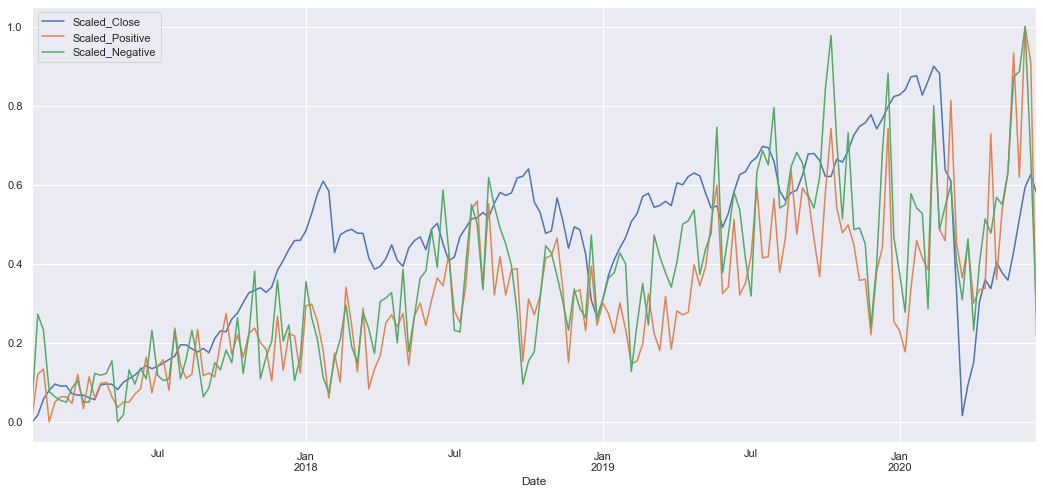

In [29]:
new_complete_df = new_complete_df.reset_index()

#Graph Size

                     
# plot two lines
#new_complete_df.plot(x='Date', y='Scaled_Positive', 'o-g')
#plt.plot(Date, Scaled_Negative, 'o-b')

# plot two lines
#plt.xlabel("Date")
#plt.ylabel("Scale")


           
new_complete_df.plot(x='Date', y=['Scaled_Close','Scaled_Positive','Scaled_Negative'], kind="line", figsize=(18, 8))

plt.show()

In [30]:
dfc_new

Positive  Negative
Date                          
2017-02-03        20        13
2017-02-10        52        63
2017-02-17        56        54
2017-02-24        16        20
2017-03-03        31        17
...              ...       ...
2020-05-22       295       195
2020-05-29       201       198
2020-06-05       315       223
2020-06-12       288       150
2020-06-19        81        63

[177 rows x 2 columns]

In [31]:
df_corpus_cleaned.head()

date                                      clean_content
0  2009-05-04 13:54:25  sure tune watch donald trump late night david ...
1  2009-05-04 20:00:10  donald trump appearing view tomorrow morning d...
2  2009-05-08 08:38:08  donald trump reads top ten financial tips late...
3  2009-05-08 15:40:15  new blog post celebrity apprentice finale less...
4  2009-05-12 09:07:28  persona never wallflower ' rather build walls ...

In [32]:
df_corpus_cleaned.shape

(43352, 2)

In [33]:
#Create positive wordlist
positive_words = []
for i in range(len(positive)):
    count = len(positive[i].split())
    if count == 1 and positive[i].split() != [';'] and positive[i].split() != [';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;']:
        positive_words.append(positive[i])

In [34]:
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [35]:
#Convert positive wordlist to df
positive_table = positive_words
#create new df 
df_positive_table = pd.DataFrame({'Positive_Words':positive_table})
print (df_positive_table)

     Positive_Words
0                a+
1            abound
2           abounds
3         abundance
4          abundant
...             ...
2001       youthful
2002           zeal
2003         zenith
2004           zest
2005          zippy

[2006 rows x 1 columns]


In [36]:
#Create negative wordlist
negative_words = []
for i in range(len(negative)):
    count = len(negative[i].split())
    if count == 1 and negative[i].split() != [';'] and negative[i].split() != [';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;']:
        negative_words.append(negative[i])

In [37]:
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [38]:
#Convert negative wordlist to df
negative_table = negative_words
#create new df 
df_negative_table = pd.DataFrame({'Negative_Words':negative_table})
print (df_negative_table)

     Negative_Words
0           2-faced
1           2-faces
2          abnormal
3           abolish
4        abominable
...             ...
4778           zaps
4779         zealot
4780        zealous
4781      zealously
4782         zombie

[4783 rows x 1 columns]


In [39]:
#Instances of positive words used by trump
trump_positive_words=[]
for i in range(len(df_corpus_cleaned)):
    wordlistused = df_corpus_cleaned.iloc[i, 1].split()
    for posword in wordlistused:
        if posword in positive_words:
            trump_positive_words.append(posword)

In [40]:
#View instances of positive words used by trump
trump_positive_words

['trump',
 'top',
 'trump',
 'like',
 'champion',
 'trump',
 'top',
 'trump',
 'trump',
 'trump',
 'like',
 'champion',
 'wonder',
 'trump',
 'like',
 'champion',
 'trump',
 'like',
 'best',
 'trump',
 'win',
 'champion',
 'trump',
 'great',
 'trump',
 'great',
 'trump',
 'fast',
 'trump',
 'like',
 'champion',
 'trump',
 'comfort',
 'trump',
 'like',
 'champion',
 'trump',
 'trump',
 'trump',
 'trump',
 'like',
 'champion',
 'trump',
 'thoughtful',
 'trump',
 'trump',
 'happy',
 'champion',
 'trump',
 'free',
 'great',
 'spectacular',
 'trump',
 'powerful',
 'trump',
 'safe',
 'happy',
 'enjoy',
 'trump',
 'innovation',
 'trump',
 'trump',
 'winners',
 'like',
 'champion',
 'trump',
 'trump',
 'trump',
 'success',
 'trump',
 'capability',
 'trump',
 'terrific',
 'trump',
 'trump',
 'trump',
 'trump',
 'golden',
 'trump',
 'top',
 'success',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'spectacular',
 'beautiful',
 'proud',
 'work',
 'greatest',
 'trump',
 'trump',
 'ha

In [41]:
#Convert list of positive word instances used by trump to df table
trump_positive_table = trump_positive_words
#create new df 
df_trump_positive_table = pd.DataFrame({'Trump Positive_Words':trump_positive_table})
print (df_trump_positive_table)

      Trump Positive_Words
0                    trump
1                      top
2                    trump
3                     like
4                 champion
...                    ...
53177            wonderful
53178               loving
53179             approval
53180                thank
53181                enjoy

[53182 rows x 1 columns]


In [42]:
#Drop the word 'trump' from df table since trump uses it to refer to himself often
new_trump_positive_table = df_trump_positive_table[df_trump_positive_table['Trump Positive_Words'] != 'trump']
new_trump_positive_table

Trump Positive_Words
1                      top
3                     like
4                 champion
6                      top
10                    like
...                    ...
53177            wonderful
53178               loving
53179             approval
53180                thank
53181                enjoy

[46845 rows x 1 columns]

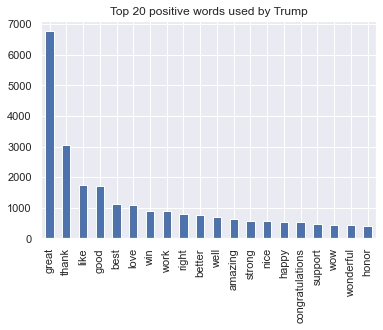

In [43]:
#Top 20 positive words used by Trump
NUM_TOP_POSWORDS = 20
top_20 = hero.visualization.top_words(new_trump_positive_table.loc[:, 'Trump Positive_Words']).head(NUM_TOP_POSWORDS)
top_20.plot.bar(rot=90, title="Top 20 positive words used by Trump");
plt.show(block=True);

In [44]:
#Instances of negative words used by trump
trump_negative_words=[]
for i in range(len(df_corpus_cleaned)):
    wordlistused = df_corpus_cleaned.iloc[i, 1].split()
    for negword in wordlistused:
        if negword in negative_words:
            trump_negative_words.append(negword)

In [45]:
#View instances of positive words used by trump
trump_negative_words

['funny',
 'miss',
 'afraid',
 'afraid',
 'opposition',
 'problems',
 'vanity',
 'devastating',
 'loss',
 'miss',
 'miss',
 'hysterical',
 'mar',
 'idiot',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'fall',
 'lost',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'raked',
 'fall',
 'unpredictable',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'humiliate',
 'scared',
 'missed',
 'impetuous',
 'sneak',
 'raving',
 'difficult',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'miss',
 'issues',
 'problem',
 'debt',
 'limit',
 'debt',
 'weakening',
 'worst',
 'desperate',
 'killing',
 'tragedy',
 'explode',
 'wrong',
 'confrontation',
 'debt',
 'debt',
 'bad',
 'radicals',
 'debt',
 'erodes',
 'waste',
 'waste',
 'debt',
 'limit',
 'sunk',
 'destroy',
 'failure',
 'problem',
 'addicted',
 'enemy',
 'destroy',
 'disaster',
 'debt',
 'unfortunately',
 'attack',
 'bad',
 'debt',
 'sadly',
 'fraud',
 'waste',
 'crazy',
 'debt',
 'de

In [46]:
#Convert list of negative word instances used by trump to df table
trump_negative_table = trump_negative_words
#create new df 
df_trump_negative_table = pd.DataFrame({'Trump Negative_Words':trump_negative_table})
print (df_trump_negative_table)

      Trump Negative_Words
0                    funny
1                     miss
2                   afraid
3                   afraid
4               opposition
...                    ...
28515                 hard
28516              radical
28517                crime
28518                drain
28519              failure

[28520 rows x 1 columns]


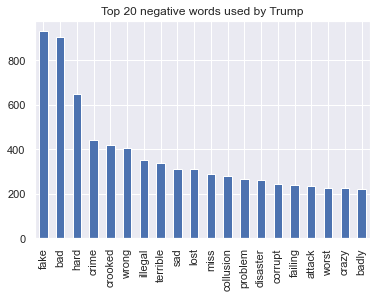

In [47]:
#Top 20 negative words used by Trump
NUM_TOP_NEGWORDS = 20
top_20 = hero.visualization.top_words(df_trump_negative_table.loc[:, 'Trump Negative_Words']).head(NUM_TOP_NEGWORDS)
top_20.plot.bar(rot=90, title="Top 20 negative words used by Trump");
plt.show(block=True);

In [48]:
#Trump used 46,845 instaces of positive words and 28,520 instances of negative words throughout his presidency
#This seems to explain the overall upward trend of the stockmarket
#The greater usage of positive words implies that Trump is always forwardlooking in nature
#Team, you may want to discuss the background of Trump from Childhood and explain how he became successful resulting in his positive nature

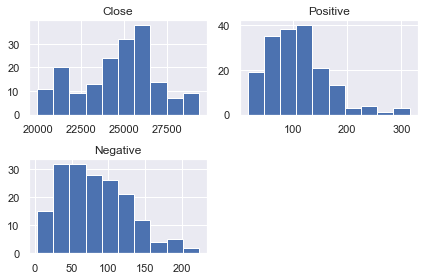

In [49]:
new_complete_df.hist(column = ['Close', 'Positive', 'Negative'])
plt.tight_layout()
plt.show()

In [50]:
from sklearn import linear_model

x = new_complete_df[['Positive']].values
y = new_complete_df['Close'].values

regr = linear_model.LinearRegression()
regr.fit(x,y)
#regr.predict(x_0)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [22.89025134]
Intercept: 22186.54560583749


In [51]:
from sklearn import metrics

y_pred = regr.predict(x)
#print(metrics.explained_variance_score(y, y_pred))
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))

1506.8979613749855
3490732.9876735


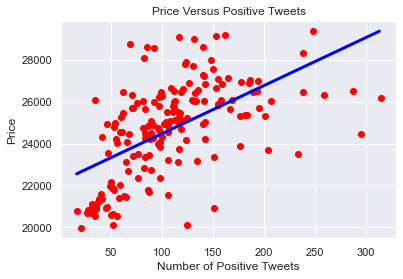

In [52]:
plt.scatter(x, y, color = 'red')
lx = np.arange(min(x), max(x), (max(x)-min(x))/200).reshape(200, 1)
plt.plot(lx, regr.predict(lx), color = 'blue', linewidth = 3)
plt.title('Price Versus Positive Tweets')
plt.xlabel('Number of Positive Tweets')
plt.ylabel('Price')
plt.show()

In [53]:
x1 = new_complete_df[['Negative']].values
y1 = new_complete_df['Close'].values

regr = linear_model.LinearRegression()
regr.fit(x1,y1)
#regr.predict(x_0)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [30.34232076]
Intercept: 22185.626708327207


In [54]:
y1_pred = regr.predict(x1)
#print(metrics.explained_variance_score(y, y_pred))
print(metrics.mean_absolute_error(y1, y1_pred))
print(metrics.mean_squared_error(y1, y1_pred))

1411.5208974834368
3134977.9115791786


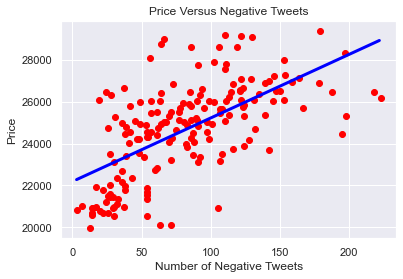

In [55]:
plt.scatter(x1, y1, color = 'red')
lx = np.arange(min(x1), max(x1), (max(x1)-min(x1))/200).reshape(200, 1)
plt.plot(lx, regr.predict(lx), color = 'blue', linewidth = 3)
plt.title('Price Versus Negative Tweets')
plt.xlabel('Number of Negative Tweets')
plt.ylabel('Price')
plt.show()

In [56]:
#For Both Trump's Positive and Negative Tweet 22,186 is the constant
#Each positive tweet results in +22.890 change in value while each nagative tweet results in +30.342 change in value
#Formula for positive tweet is 'y = 22.890x + 22,186'
#Formula for positive tweet is 'y = 30.342x + 22,186'
#It appears that the negative tweet moves the market more than the positive tweet

In [57]:
new_complete_df.set_index("Date", inplace=True)

In [58]:
import statsmodels.api as sm
#Resample new_complete_df on monthly basis
data_columns = ['Close','Positive','Negative']
newdf_month_mean = new_complete_df[data_columns].resample('M').mean()
newdf_month_mean.head()

Close  Positive  Negative
Date                                        
2017-02-28  20354.746833     36.00     37.50
2017-03-31  20823.200400     36.60     18.80
2017-04-30  20679.889375     38.75     21.75
2017-05-31  20928.586500     34.75     19.25
2017-06-30  21285.070700     42.40     34.00

Text(0.5, 0.98, 'DJIA Decomposition')

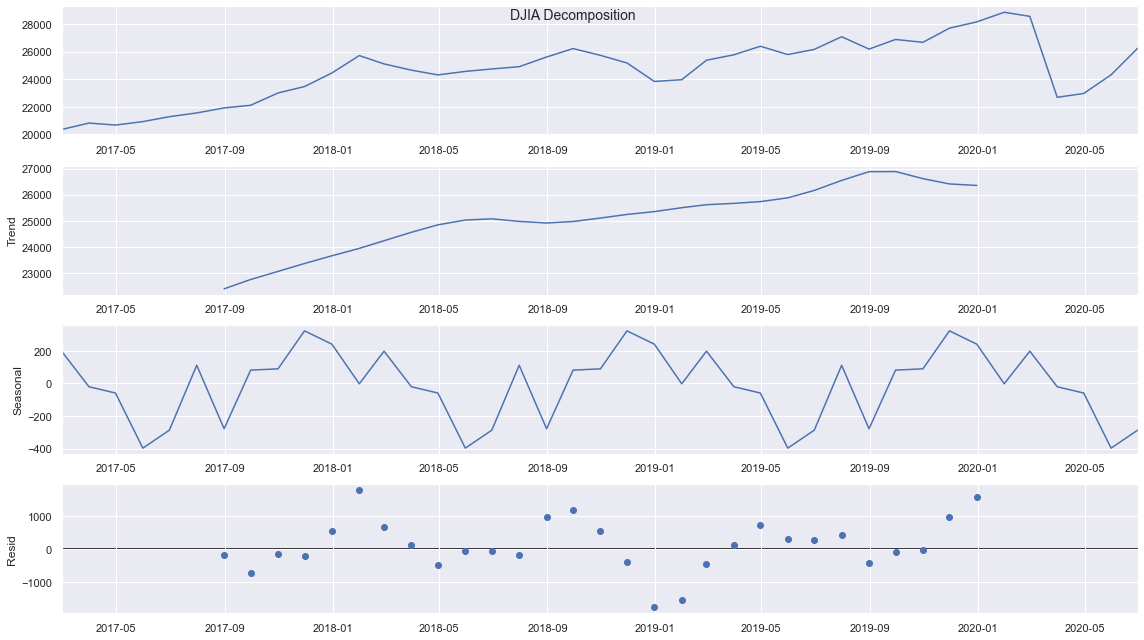

In [59]:
#Decomposition of Time Series
y = newdf_month_mean[['Close']]
#y = y.set_index('Date')
y.index=y.index.to_pydatetime()  # seasonal_decompose does not accept PeriodIndex, a workaround would be converting the index to DatetimeIndex using to_timestamp method:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
plt.rcParams["figure.figsize"] = [16,9]
decomp = decomposition.plot()
decomp.suptitle('DJIA Decomposition', fontsize=14)

Text(0.5, 0.98, 'Positive Words Decomposition')

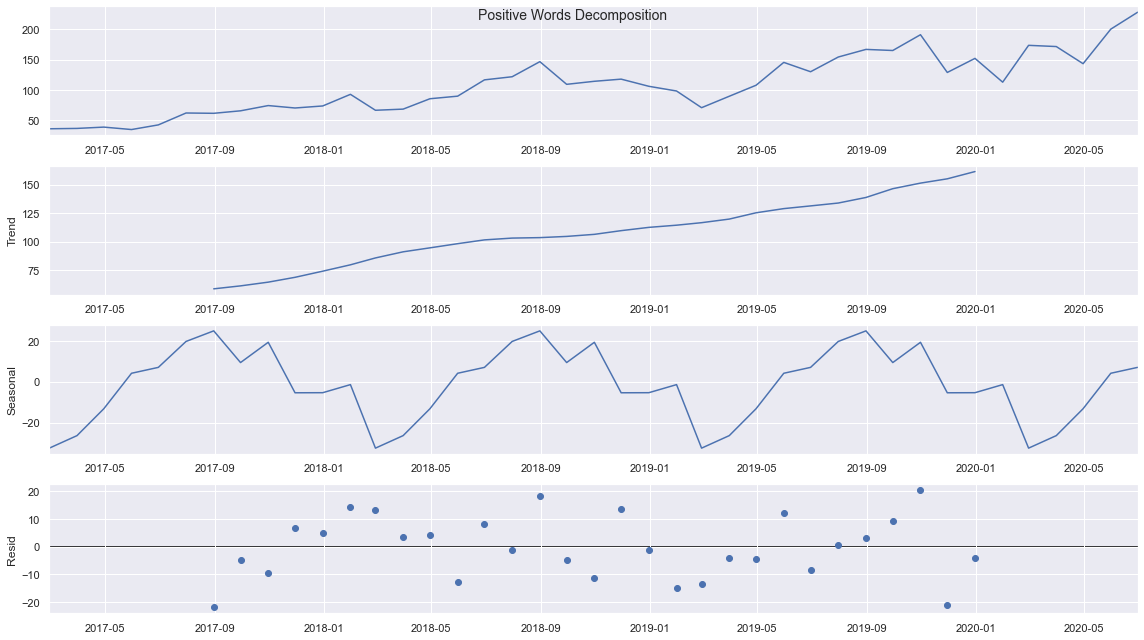

In [60]:
#Decomposition of Time Series
y = newdf_month_mean[['Positive']]
#y = y.set_index('Date')
y.index=y.index.to_pydatetime()  # seasonal_decompose does not accept PeriodIndex, a workaround would be converting the index to DatetimeIndex using to_timestamp method:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
plt.rcParams["figure.figsize"] = [16,9]
decomp = decomposition.plot()
decomp.suptitle('Positive Words Decomposition', fontsize=14)

Text(0.5, 0.98, 'Negative Words Decomposition')

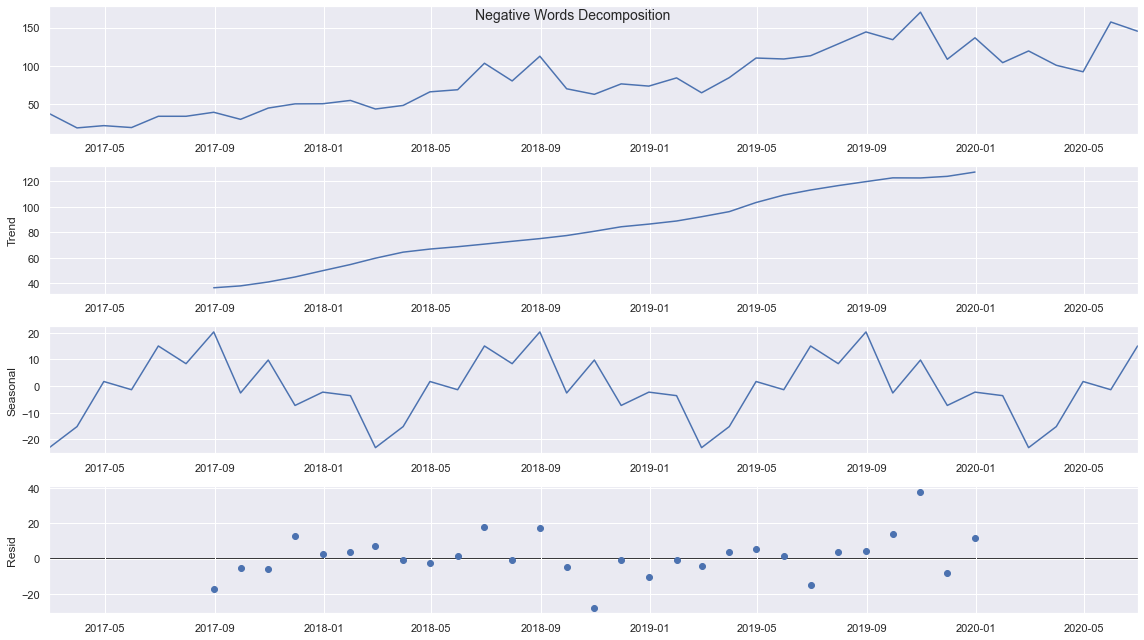

In [61]:
#Decomposition of Time Series
y = newdf_month_mean[['Negative']]
#y = y.set_index('Date')
y.index=y.index.to_pydatetime()  # seasonal_decompose does not accept PeriodIndex, a workaround would be converting the index to DatetimeIndex using to_timestamp method:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
plt.rcParams["figure.figsize"] = [16,9]
decomp = decomposition.plot()
decomp.suptitle('Negative Words Decomposition', fontsize=14)

In [62]:
#From timeseries decomposition, it appears that there is a correclation between the number of tweets and stockmarket index
#Considering that Trump used more positive words that negative words there is a possibility that there is a relationship betwwen the number of tweets and stockmarket
#While it is likely that the number of tweets did not influence the stockmarket there is a possibility that the stockmarket possibly influenced the number of tweets
#Alternatively the number of tweets could correlate with duration in office
#For exanple based on personal observation we obserbed that employees who have been in the same employment and same role for sometime tended to have spare time to attend to social media
#This could potentially be associated with increased repetation of work resulting in efficiency of work performance and increased spare capacity
#Smith (2005) explains this efficiency through the illustration of job specilisation in a pin production context
#Smith, A. (2005). The wealth of nations. Penguin Books.

In [63]:
# Transform into a numpy arrays
y = new_complete_df.iloc[:,3:4].values
print(y.shape)
x = new_complete_df.iloc[:,4:6].values
print(x.shape)

(177, 1)
(177, 2)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=123)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:
predictions = model.predict(x_test)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(123, 2)
(54, 2)
(123, 1)
(54, 1)
(177,)


In [70]:
y_pred

array([22644.35063261, 23376.83867545, 23468.39968081, 22552.78962726,
       22896.14339734, 22987.70440269, 22987.70440269, 22873.253146  ,
       23376.83867545, 22781.69214065, 23331.05817278, 22964.81415136,
       23216.60691608, 23239.49716742, 22987.70440269, 22804.58239198,
       22896.14339734, 22896.14339734, 23033.48490537, 23125.04591073,
       23674.41194286, 23056.37515671, 23514.18018349, 23628.63144018,
       23102.15565939, 24177.99747231, 23537.07043483, 23308.16792144,
       23376.83867545, 24155.10722097, 23353.94842412, 23399.72892679,
       23331.05817278, 23926.20470758, 24429.79023704, 23720.19244554,
       24063.54621562, 23674.41194286, 24086.43646696, 24177.99747231,
       23926.20470758, 23811.75345089, 23262.38741876, 24384.00973436,
       23445.50942947, 24086.43646696, 24040.65596428, 23399.72892679,
       24567.13174507, 24590.02199641, 24292.448729  , 23788.86319955,
       22964.81415136, 23743.08269687, 23239.49716742, 24887.59526381,
      

In [71]:
#Convert prediction array to df
#create new df 
predicted_df = pd.DataFrame({'Predicted_Price':y_pred})
predicted_df.head(180)

Predicted_Price
0       22644.350633
1       23376.838675
2       23468.399681
3       22552.789627
4       22896.143397
..               ...
172     28939.169751
173     26787.486125
174     29396.974778
175     28778.937991
176     24040.655964

[177 rows x 1 columns]

In [72]:
new_complete_df = new_complete_df.reset_index()

In [73]:
new_complete_df.head()

Date         Close  Positive  Negative  Scaled_Close  Scaled_Positive  \
0 2017-02-03  19949.103333      20.0      13.0      0.000000         0.013378   
1 2017-02-10  20127.764000      52.0      63.0      0.017032         0.120401   
2 2017-02-17  20554.450000      56.0      54.0      0.057708         0.133779   
3 2017-02-24  20787.670000      16.0      20.0      0.079941         0.000000   
4 2017-03-03  20954.782000      31.0      17.0      0.095872         0.050167   

   Scaled_Negative  
0         0.045455  
1         0.272727  
2         0.231818  
3         0.077273  
4         0.063636

In [74]:
new_predicted_df = pd.concat([new_complete_df, predicted_df], axis=1)

In [75]:
new_predicted_df.head()

Date         Close  Positive  Negative  Scaled_Close  Scaled_Positive  \
0 2017-02-03  19949.103333      20.0      13.0      0.000000         0.013378   
1 2017-02-10  20127.764000      52.0      63.0      0.017032         0.120401   
2 2017-02-17  20554.450000      56.0      54.0      0.057708         0.133779   
3 2017-02-24  20787.670000      16.0      20.0      0.079941         0.000000   
4 2017-03-03  20954.782000      31.0      17.0      0.095872         0.050167   

   Scaled_Negative  Predicted_Price  
0         0.045455     22644.350633  
1         0.272727     23376.838675  
2         0.231818     23468.399681  
3         0.077273     22552.789627  
4         0.063636     22896.143397

In [76]:
new_predicted_df['Date'] = new_predicted_df.index
new_predicted_df.head()

Date         Close  Positive  Negative  Scaled_Close  Scaled_Positive  \
0     0  19949.103333      20.0      13.0      0.000000         0.013378   
1     1  20127.764000      52.0      63.0      0.017032         0.120401   
2     2  20554.450000      56.0      54.0      0.057708         0.133779   
3     3  20787.670000      16.0      20.0      0.079941         0.000000   
4     4  20954.782000      31.0      17.0      0.095872         0.050167   

   Scaled_Negative  Predicted_Price  
0         0.045455     22644.350633  
1         0.272727     23376.838675  
2         0.231818     23468.399681  
3         0.077273     22552.789627  
4         0.063636     22896.143397

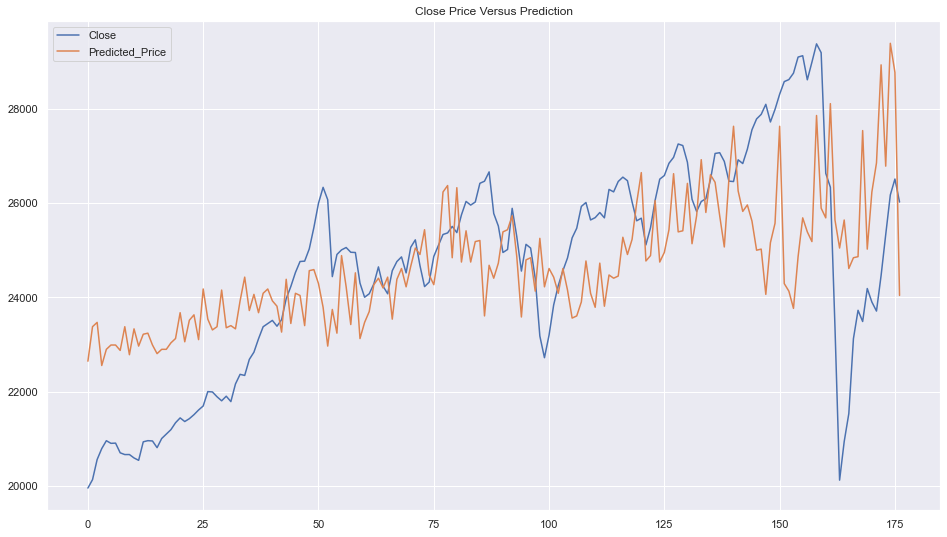

In [77]:
plt.title('Close Price Versus Prediction')
plt.plot(new_predicted_df['Close'])
plt.plot(new_predicted_df['Predicted_Price'])
plt.legend(['Close','Predicted_Price'])

In [78]:
#The chart describes the actual DJI index versus predicted DJI
#As expected, it is not possible to predict the stock price of based on Trump's tweet

In [79]:
from gensim.parsing.preprocessing import remove_stopwords
import gensim
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
final_stopwords = all_stopwords.union(set(['la','el','donald', 'trump','bit','ly', 'twitter status', 'pic twitter', 'twitter', 'deck','j','p','pic']))
final_stopwords = list(final_stopwords)

In [80]:
final_stopwords

['hundred',
 'had',
 'him',
 'besides',
 'have',
 'co',
 'interest',
 'who',
 'same',
 'are',
 'nobody',
 'cry',
 'used',
 'don',
 'across',
 'due',
 'hereby',
 'say',
 'nothing',
 'ltd',
 'mill',
 'should',
 'through',
 'ourselves',
 'so',
 'less',
 'did',
 'against',
 'afterwards',
 'his',
 'p',
 'and',
 'thence',
 'hereupon',
 'computer',
 'eight',
 'those',
 'from',
 'doing',
 'eleven',
 'meanwhile',
 'no',
 'get',
 'un',
 'after',
 'onto',
 'full',
 'well',
 'thin',
 'another',
 'has',
 'back',
 'sometimes',
 'where',
 'we',
 'kg',
 'but',
 'part',
 'either',
 'own',
 'up',
 'off',
 'wherein',
 'mine',
 'describe',
 'whereby',
 'cannot',
 'being',
 'thereby',
 'go',
 'formerly',
 'latterly',
 'couldnt',
 'below',
 'somehow',
 'various',
 'three',
 'under',
 'twitter status',
 'himself',
 'please',
 'third',
 'hers',
 'toward',
 'fill',
 'thru',
 'hence',
 'whither',
 'many',
 'become',
 'seems',
 'thereupon',
 'sixty',
 'between',
 'us',
 'since',
 'though',
 'although',
 'mostly'

In [81]:
df_corpus_cleaned['tweet_without_stopwords'] = df_corpus_cleaned['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))

<ipython-input-81-20ea4ce83ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corpus_cleaned['tweet_without_stopwords'] = df_corpus_cleaned['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))


In [82]:
df_corpus_cleaned.head().append(df_corpus_cleaned.tail())

date                                      clean_content  \
0      2009-05-04 13:54:25  sure tune watch donald trump late night david ...   
1      2009-05-04 20:00:10  donald trump appearing view tomorrow morning d...   
2      2009-05-08 08:38:08  donald trump reads top ten financial tips late...   
3      2009-05-08 15:40:15  new blog post celebrity apprentice finale less...   
4      2009-05-12 09:07:28  persona never wallflower ' rather build walls ...   
43347  2020-06-17 19:00:32  joe biden total failure government "bungled" e...   
43348  2020-06-17 19:11:47            interviewed seanhannity tonight p enjoy   
43349  2020-06-17 21:27:33                         pic twitter com 3lm1spbu8x   
43350  2020-06-17 21:28:38                         pic twitter com vpce5maduz   
43351  2020-06-17 21:28:52                         pic twitter com vllc0bhw41   

                                 tweet_without_stopwords  
0      sure tune watch late night david letterman pre...  
1      appearing view tomorrow morning discuss celebr...  
2      reads financial tips late david letterman http...  
3      new blog post celebrity apprentice finale less...  
4                 persona wallflower ' build walls cling  
43347  joe biden total failure government "bungled" t...  
43348              interviewed seanhannity tonight enjoy  
43349                                     com 3lm1spbu8x  
43350                                     com vpce5maduz  
43351                                     com vllc0bhw41

In [83]:
#Check for words in English dictionary and import from nltk
import nltk
from nltk.corpus import words
print(nltk.corpus.words.readme())
eng_words = words.words()

Wordlists

en: English, http://en.wikipedia.org/wiki/Words_(Unix)
en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932)



In [84]:
df_corpus_cleaned['tweet_english_without_stop'] = df_corpus_cleaned['tweet_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in (eng_words)]))

<ipython-input-84-779ac84eba7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corpus_cleaned['tweet_english_without_stop'] = df_corpus_cleaned['tweet_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word in (eng_words)]))


In [85]:
df_corpus_cleaned.head().append(df_corpus_cleaned.tail())

date                                      clean_content  \
0      2009-05-04 13:54:25  sure tune watch donald trump late night david ...   
1      2009-05-04 20:00:10  donald trump appearing view tomorrow morning d...   
2      2009-05-08 08:38:08  donald trump reads top ten financial tips late...   
3      2009-05-08 15:40:15  new blog post celebrity apprentice finale less...   
4      2009-05-12 09:07:28  persona never wallflower ' rather build walls ...   
43347  2020-06-17 19:00:32  joe biden total failure government "bungled" e...   
43348  2020-06-17 19:11:47            interviewed seanhannity tonight p enjoy   
43349  2020-06-17 21:27:33                         pic twitter com 3lm1spbu8x   
43350  2020-06-17 21:28:38                         pic twitter com vpce5maduz   
43351  2020-06-17 21:28:52                         pic twitter com vllc0bhw41   

                                 tweet_without_stopwords  \
0      sure tune watch late night david letterman pre...   
1      appearing view tomorrow morning discuss celebr...   
2      reads financial tips late david letterman http...   
3      new blog post celebrity apprentice finale less...   
4                 persona wallflower ' build walls cling   
43347  joe biden total failure government "bungled" t...   
43348              interviewed seanhannity tonight enjoy   
43349                                     com 3lm1spbu8x   
43350                                     com vpce5maduz   
43351                                     com vllc0bhw41   

                              tweet_english_without_stop  
0                sure tune watch late night list tonight  
1      view tomorrow morning discuss celebrity appren...  
2                                   financial late funny  
3       new post celebrity apprentice finale learned way  
4                         persona wallflower build cling  
43347               joe total failure government touched  
43348                                      tonight enjoy  
43349                                                     
43350                                                     
43351

In [86]:
tweet_df = df_corpus_cleaned[['date','tweet_english_without_stop']]
tweet_df['tweet_english_without_stop'].replace("", np.nan, inplace=True)
new_tweet_df = tweet_df.dropna(axis=0, how='any')
new_tweet_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


date                         tweet_english_without_stop
0  2009-05-04 13:54:25            sure tune watch late night list tonight
1  2009-05-04 20:00:10  view tomorrow morning discuss celebrity appren...
2  2009-05-08 08:38:08                               financial late funny
3  2009-05-08 15:40:15   new post celebrity apprentice finale learned way
4  2009-05-12 09:07:28                     persona wallflower build cling

In [87]:
new_tweet_df.to_excel('Cleaned With English Words.xlsx', index = False)

In [88]:
new_tweet_df.iloc[0,1]

'sure tune watch late night list tonight'

In [89]:
#Create list of lists from sentenses in table 
listused = []
for i in range(len(new_tweet_df)):
    textlistused = new_tweet_df.iloc[i, 1].split()
    listused.append(textlistused)

In [90]:
#Use Word2Vec is that it can capture the distance between individual words
from gensim.models import Word2Vec
model = Word2Vec(listused, min_count=1)

In [91]:
listused

[['sure', 'tune', 'watch', 'late', 'night', 'list', 'tonight'],
 ['view',
  'tomorrow',
  'morning',
  'discuss',
  'celebrity',
  'apprentice',
  'new',
  'book',
  'think',
  'like',
  'champion'],
 ['financial', 'late', 'funny'],
 ['new', 'post', 'celebrity', 'apprentice', 'finale', 'learned', 'way'],
 ['persona', 'wallflower', 'build', 'cling'],
 ['miss', 'tara', 'conner', 'fired', 'believer', 'second'],
 ['listen', 'interview', 'new', 'book', 'think', 'like', 'champion'],
 ['strive', 'wholeness', 'sense', 'wonder', 'intact'],
 ['enter', 'think', 'like', 'champion', 'book', 'contest', 'contest'],
 ['achiever', 'plateau', 'beginning'],
 ['afraid', 'unique', 'like', 'afraid', 'best', 'self'],
 ['win', 'champion', 'view', 'moment'],
 ['days', 'use', 'little', 'power', 'thinking'],
 ['know', 'precipice', 'great'],
 ['read', 'great', 'interview', 'new', 'york', 'times', 'magazine'],
 ['fast', 'short', 'direct'],
 ['forget',
  'enter',
  'think',
  'like',
  'champion',
  'book',
  'cont

In [92]:
#Query words
print (model.wv.similarity('sure', 'tune')) #Tests query of two of the top twenty positive words
print (model.wv.similarity('fake', 'crazy')) #Tests query of two of the top twenty negative words

0.94646466
0.71500015


In [93]:
#Number of vocabulary in model
print (len(list(model.wv.vocab)))

9709


In [94]:
#Reference: https://ai.intelligentonlinetools.com/ml/k-means-clustering-example-word2vec/
X = model[model.wv.vocab]
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=6
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

<ipython-input-94-545524752a2f>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


[3, 5, 5, 2, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5, 4, 1, 2, 2, 2, 3, 5, 2, 4, 2, 2, 0, 4, 5, 2, 2, 2, 3, 0, 2, 5, 2, 3, 4, 2, 2, 2, 3, 3, 5, 3, 4, 2, 3, 2, 4, 3, 2, 4, 4, 4, 4, 4, 2, 5, 2, 5, 5, 3, 4, 2, 2, 3, 3, 5, 4, 1, 2, 2, 3, 2, 2, 5, 3, 3, 2, 0, 4, 5, 5, 2, 2, 5, 5, 5, 2, 2, 3, 5, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 5, 2, 2, 2, 2, 3, 4, 3, 3, 2, 3, 5, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 4, 2, 3, 5, 2, 3, 5, 3, 5, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 3, 3, 2, 3, 4, 5, 3, 5, 3, 4, 3, 3, 5, 5, 5, 4, 5, 2, 3, 2, 2, 2, 3, 5, 3, 3, 2, 3, 3, 2, 5, 3, 3, 2, 3, 3, 5, 2, 2, 3, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3, 2, 3, 5, 2, 3, 2, 3, 2, 3, 3, 5, 2, 3, 3, 3, 4, 5, 5, 3, 5, 3, 4, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 2, 2, 3, 3, 5, 5, 2, 3, 2, 3, 2, 2, 2, 3, 5, 1, 0, 5, 5, 3, 3, 3, 2, 5, 1, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 5, 3, 2, 5, 5, 5, 2, 5, 3, 3, 4, 3, 3, 2, 0, 3, 3, 5, 5, 2, 3, 3, 2, 3, 5, 5, 3, 3, 5, 5, 2, 3, 5, 2, 2, 3, 3, 2, 3, 5, 2, 0, 2, 2, 2, 3, 2, 3, 

In [95]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

sure:3
tune:5
watch:5
late:2
night:5
list:3
tonight:5
view:3
tomorrow:5
morning:5
discuss:3
celebrity:5
apprentice:5
new:5
book:5
think:4
like:1
champion:2
financial:2
funny:2
post:3
finale:5
learned:2
way:4
persona:2
wallflower:2
build:0
cling:4
miss:5
tara:2
conner:2
fired:2
believer:3
second:0
listen:2
interview:5
strive:2
wholeness:3
sense:4
wonder:2
intact:2
enter:2
contest:3
achiever:3
plateau:5
beginning:3
afraid:4
unique:2
best:3
self:2
win:4
moment:3
days:2
use:4
little:4
power:4
thinking:4
know:4
precipice:2
great:5
read:2
york:5
times:5
magazine:3
fast:4
short:2
direct:2
forget:3
fan:3
today:5
higher:4
opposition:1
comfort:2
zone:2
excerpt:3
quits:2
moving:2
forward:5
check:3
showcase:3
page:2
run:0
business:4
week:5
birthday:5
send:2
b:2
day:5
thanks:5
thoughtful:5
vanity:2
chronicle:2
wishing:3
happy:5
father:3
dad:3
everyday:2
life:2
commercial:2
free:4
raw:2
big:2
rating:3
friend:3
spectacular:5
entertainer:2
devastating:2
loss:2
powerful:2
frank:3
economy:4
van:3
record

glorification:5
jean:3
glow:5
elegance:3
contagious:3
dress:3
silence:3
brazil:2
terribly:2
nicely:2
crowned:3
inevitable:2
dire:2
cement:2
lama:4
hilt:2
brush:3
lawsuit:2
inn:3
complex:4
rio:3
preferably:4
montana:3
reflex:2
multiple:2
creative:2
jess:2
prospective:4
skate:5
invitation:3
tone:2
eve:3
bone:2
marrow:2
transplant:2
robin:3
kicking:2
complain:2
undertake:2
accomplish:2
revolutionize:3
port:3
occasion:3
tenacity:4
observe:3
copa:3
sustained:2
productive:2
envelope:2
kyle:2
doll:3
equestrian:3
appetite:4
sod:4
comedian:3
thee:3
representative:2
genius:2
documentation:2
covering:2
apparently:2
incident:2
bright:2
lackluster:4
passionate:2
frequently:2
stardom:2
acceptance:2
gossip:2
trap:2
forgot:2
handwriting:4
analyst:2
argo:3
helpful:2
fierce:3
lowly:2
sponge:1
homework:2
implicate:2
playboy:3
playmate:3
singlehandedly:2
transferring:3
removed:2
bean:5
revealing:2
timothy:3
burke:2
fiasco:2
mentally:2
sympathy:2
trophy:3
brent:4
pot:2
corner:2
pete:2
neal:3
shoe:2
harm:2


bilateral:3
palace:2
unbreakable:2
corning:3
spicer:3
pardon:2
washed:2
torturing:4
protectionist:4
consultation:3
entail:4
ridding:3
valor:3
implode:4
outdated:2
reconciliation:2
roar:5
stifling:2
preparedness:5
suppression:1
modernize:2
delegation:3
globally:3
unwisely:3
creed:2
equivalency:2
stonewall:2
comparably:2
protective:2
combatant:2
heal:4
onward:3
everlasting:3
modernization:3
somber:3
famously:2
brock:3
heed:3
doings:3
landfall:2
rainfall:2
flash:3
renegotiation:4
devotion:2
appeasement:3
weary:5
refinery:3
raging:2
evacuation:2
demented:2
untruth:3
eternally:2
tricky:5
ashraf:3
mightily:2
curry:3
hesitating:3
laughingly:4
kneeling:3
safely:2
electrical:3
kneel:3
isolate:3
roaring:2
metropolitan:3
disparage:1
conjunction:2
congresswoman:2
colon:2
warmth:2
verification:2
repetitive:2
racking:3
tanked:2
recording:2
tenfold:2
demean:2
appropriate:2
recognizable:2
grief:2
baker:3
revitalize:3
harmful:2
assertion:3
compliance:3
brazenly:2
colonel:2
receipt:4
lightly:3
widow:2
a

In [96]:
print(words)

['sure', 'tune', 'watch', 'late', 'night', 'list', 'tonight', 'view', 'tomorrow', 'morning', 'discuss', 'celebrity', 'apprentice', 'new', 'book', 'think', 'like', 'champion', 'financial', 'funny', 'post', 'finale', 'learned', 'way', 'persona', 'wallflower', 'build', 'cling', 'miss', 'tara', 'conner', 'fired', 'believer', 'second', 'listen', 'interview', 'strive', 'wholeness', 'sense', 'wonder', 'intact', 'enter', 'contest', 'achiever', 'plateau', 'beginning', 'afraid', 'unique', 'best', 'self', 'win', 'moment', 'days', 'use', 'little', 'power', 'thinking', 'know', 'precipice', 'great', 'read', 'york', 'times', 'magazine', 'fast', 'short', 'direct', 'forget', 'fan', 'today', 'higher', 'opposition', 'comfort', 'zone', 'excerpt', 'quits', 'moving', 'forward', 'check', 'showcase', 'page', 'run', 'business', 'week', 'birthday', 'send', 'b', 'day', 'thanks', 'thoughtful', 'vanity', 'chronicle', 'wishing', 'happy', 'father', 'dad', 'everyday', 'life', 'commercial', 'free', 'raw', 'big', 'rati

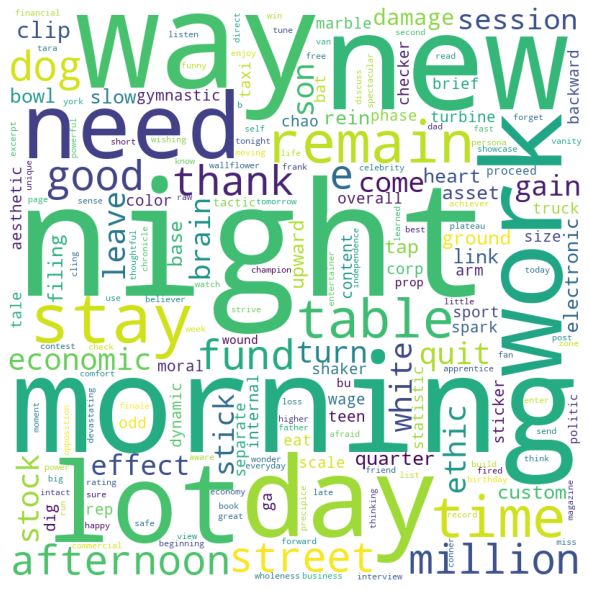

In [97]:
#Reference: https://appdividend.com/2020/12/14/how-to-convert-python-string-to-bytes/#:~:text=Convert%20Python%20String%20to%20Bytes.%20To%20convert%20Python,and%20encode%20it%20with%20this%20encoding%20standard%2C%E2%80%9D%20
from wordcloud import WordCloud

comment_words = ''
for val in words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)